# Progetto Business Intelligence per i Servizi Finanziari

## 1 - Sommario dei dati utilizzati

### Download dei dati

In [370]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [371]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'JNJ', 'PFE']

In [372]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [373]:
START_DATE = '2014-05-31'
END_DATE = '2024-05-31'

In [374]:
all_data = get(tickers, start=START_DATE, end=END_DATE)
all_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859392   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140232   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370213   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450142   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393908   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

### Fusione

Prendo solo la colonna 'Adj Close' per ogni asset e li fondo in un unico dataset con le date come indici, i ticker come colonne e l'adj close come valori.

In [375]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [376]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px.head()

Ticker           AAPL        BAC        JNJ        JPM      NVDA        PFE
Date                                                                       
2014-06-02  19.859392  12.456398  77.708107  41.671864  0.450743  19.234697
2014-06-03  20.140232  12.415586  77.928696  41.860081  0.448839  19.157007
2014-06-04  20.370213  12.415586  78.096001  41.920319  0.449315  19.189379
2014-06-05  20.450142  12.595166  78.506729  42.635563  0.451218  19.267075
2014-06-06  20.393908  12.725769  78.476265  42.891537  0.452884  19.046942

### Grafico Adjusted Close

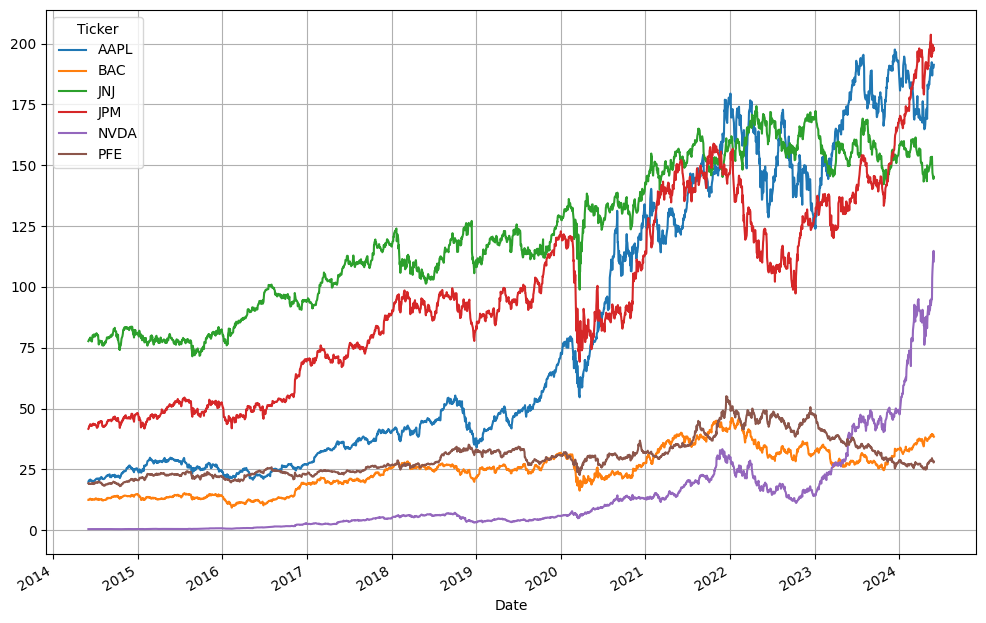

In [377]:
daily_close_px.plot(figsize=(12,8))
plt.grid()

### Grafici di prezzi e volumi per ogni asset

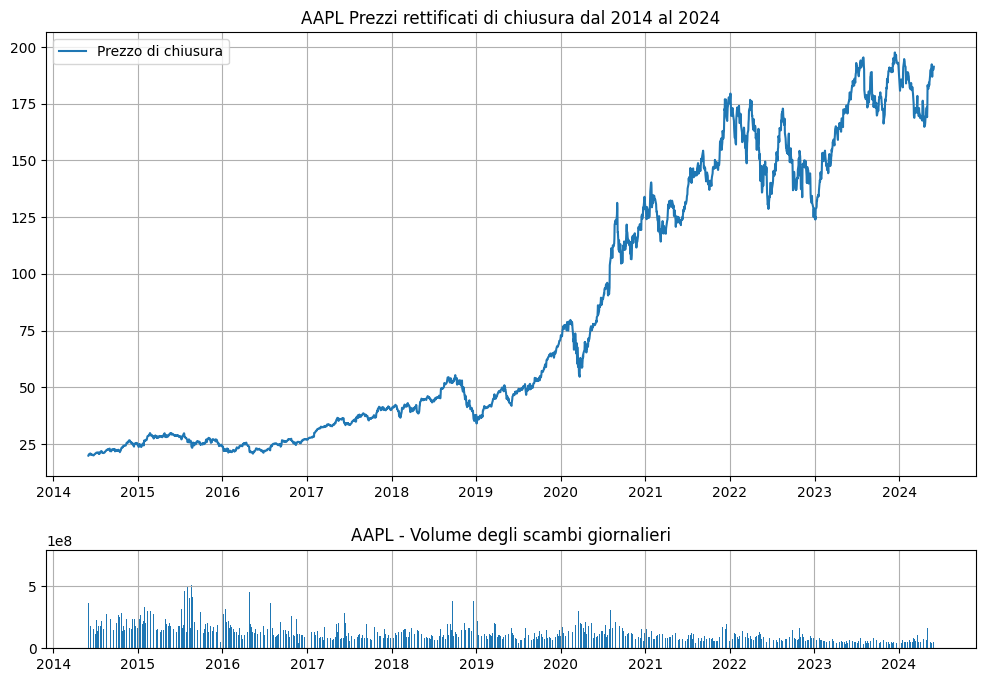

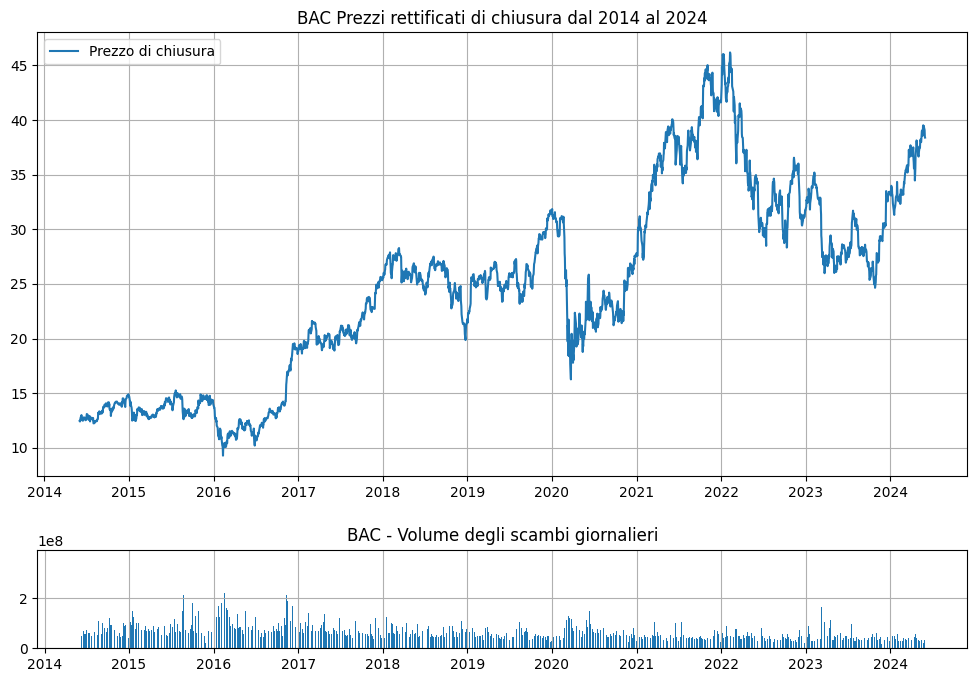

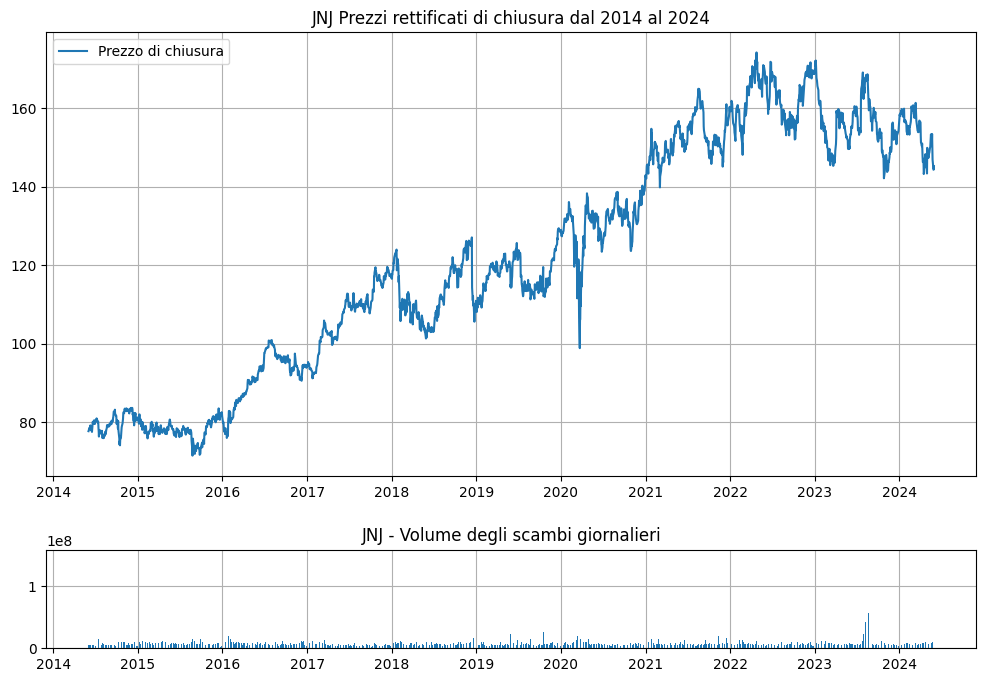

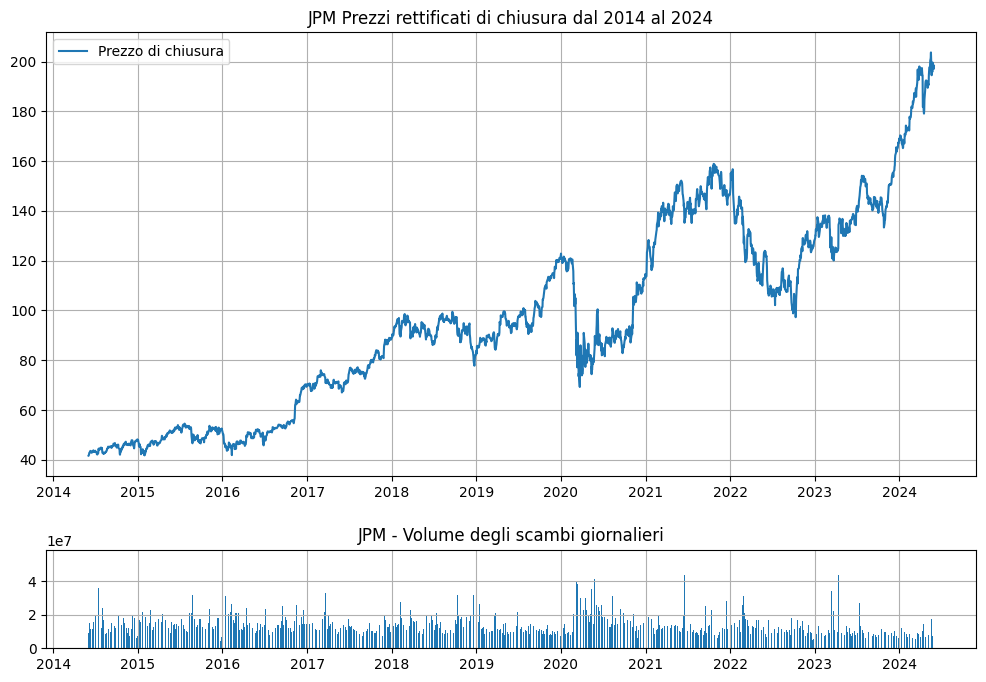

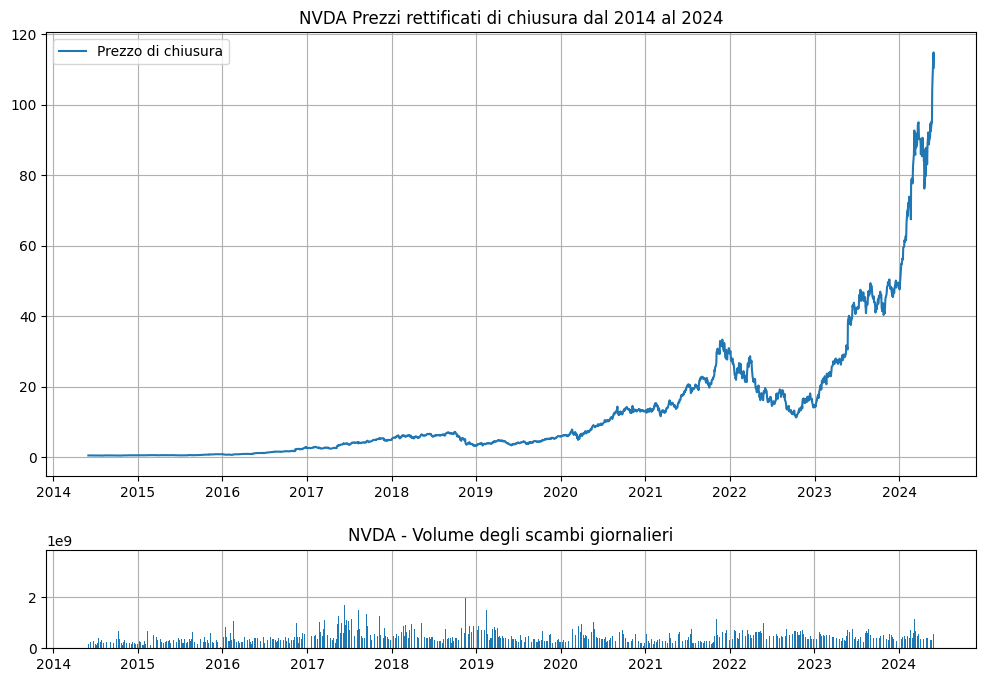

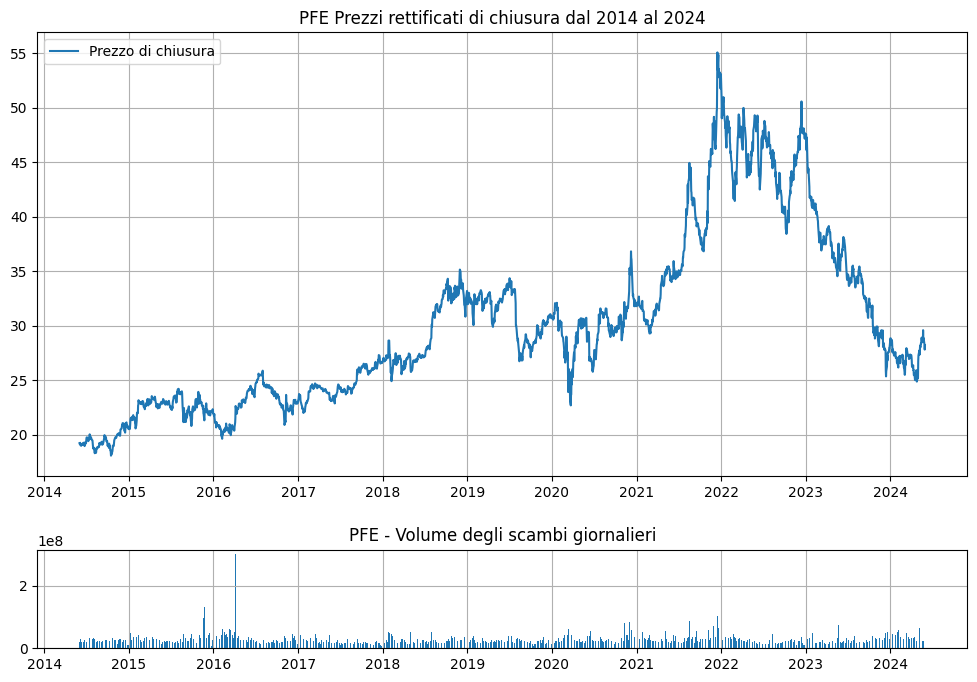

In [378]:
for ticker in daily_close_px.columns:
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
    top.plot(daily_close_px.index,
            daily_close_px[ticker],
            label = 'Prezzo di chiusura')
    plt.title(f'{ticker} Prezzi rettificati di chiusura dal 2014 al 2024')
    plt.legend(loc=2)
    plt.grid()
    bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
    bottom.bar(all_data.Volume.loc[ticker].index, all_data.Volume.loc[ticker])
    plt.title(f'{ticker} - Volume degli scambi giornalieri')
    plt.gcf().set_size_inches(12,8)
    plt.subplots_adjust(hspace=0.75)
    plt.grid()
    plt.show()

## 2 - Statistiche descrittive

### Rendimento percentuale

In [379]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.dropna(inplace=True)
daily_pct_change.head()

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  0.014141 -0.003276  0.002839  0.004517 -0.004224 -0.004039
2014-06-04  0.011419  0.000000  0.002147  0.001439  0.001061  0.001690
2014-06-05  0.003924  0.014464  0.005259  0.017062  0.004237  0.004049
2014-06-06 -0.002750  0.010369 -0.000388  0.006004  0.003692 -0.011425
2014-06-09  0.016001  0.016036  0.000388  0.007899  0.001051 -0.002379

### Rendimento Cumulato

In [380]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

Ticker          AAPL       BAC       JNJ       JPM        NVDA       PFE
Date                                                                    
2014-06-03  1.014141  0.996724  1.002839  1.004517    0.995776  0.995961
2014-06-04  1.025722  0.996724  1.004992  1.005962    0.996832  0.997644
2014-06-05  1.029747  1.011140  1.010277  1.023126    1.001056  1.001683
2014-06-06  1.026915  1.021625  1.009885  1.029269    1.004752  0.990239
2014-06-09  1.043347  1.038008  1.010277  1.037399    1.005808  0.987883
...              ...       ...       ...       ...         ...       ...
2024-05-23  9.410157  3.125559  1.926440  4.699450  230.265555  1.491575
2024-05-24  9.566254  3.167850  1.891308  4.789898  236.188619  1.501453
2024-05-28  9.566758  3.137528  1.857979  4.761021  252.675611  1.471299
2024-05-29  9.581864  3.089651  1.858751  4.727849  254.725383  1.446345
2024-05-30  9.632218  3.082470  1.869560  4.756965  245.130891  1.466101

[2516 rows x 6 columns]

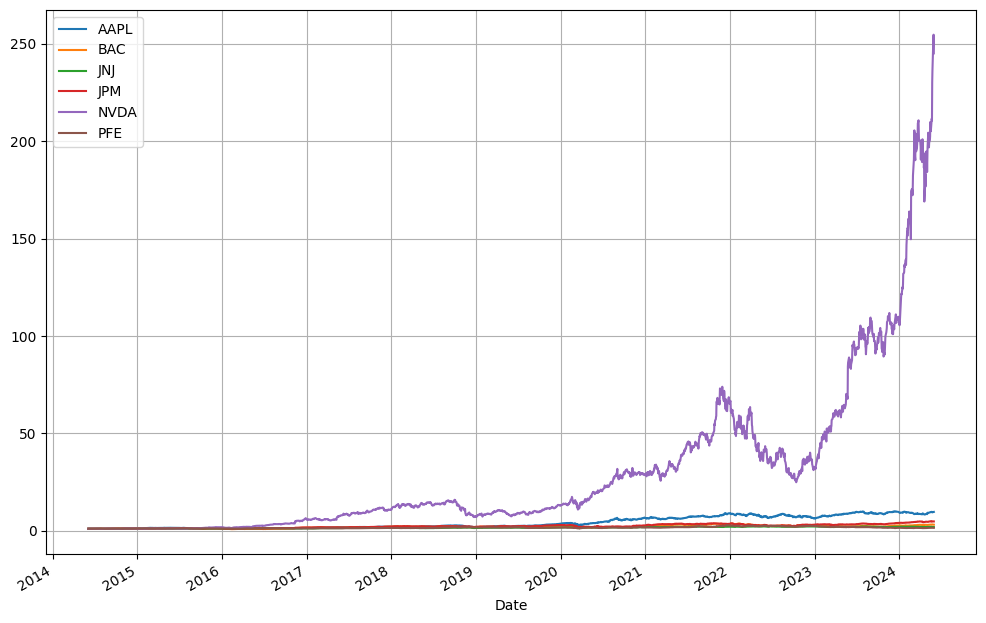

In [381]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

### Rendimento composto annuo

In [382]:
annual_compounded_returns = (cum_daily_return.iloc[-1] ** (1 / 10)) - 1
annual_compounded_returns

Ticker
AAPL    0.254217
BAC     0.119154
JNJ     0.064569
JPM     0.168781
NVDA    0.733564
PFE     0.039002
Name: 2024-05-30 00:00:00, dtype: float64

### Rendimento Semplice Netto e Lordo e Rendimento Logaritmico

In [383]:
daily_RS_gross = daily_close_px / daily_close_px.shift(1)
daily_RS_gross.dropna(inplace=True)
daily_RS_gross.head()

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  1.014141  0.996724  1.002839  1.004517  0.995776  0.995961
2014-06-04  1.011419  1.000000  1.002147  1.001439  1.001061  1.001690
2014-06-05  1.003924  1.014464  1.005259  1.017062  1.004237  1.004049
2014-06-06  0.997250  1.010369  0.999612  1.006004  1.003692  0.988575
2014-06-09  1.016001  1.016036  1.000388  1.007899  1.001051  0.997621

In [384]:
daily_RS_net = daily_close_px.pct_change(1)
daily_RS_net.dropna(inplace=True)
daily_RS_net.head()

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  0.014141 -0.003276  0.002839  0.004517 -0.004224 -0.004039
2014-06-04  0.011419  0.000000  0.002147  0.001439  0.001061  0.001690
2014-06-05  0.003924  0.014464  0.005259  0.017062  0.004237  0.004049
2014-06-06 -0.002750  0.010369 -0.000388  0.006004  0.003692 -0.011425
2014-06-09  0.016001  0.016036  0.000388  0.007899  0.001051 -0.002379

In [385]:
import numpy as np
daily_RL = np.log(daily_RS_gross)
daily_RL.head()

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  0.014042 -0.003282  0.002835  0.004506 -0.004233 -0.004047
2014-06-04  0.011354  0.000000  0.002145  0.001438  0.001060  0.001688
2014-06-05  0.003916  0.014361  0.005245  0.016918  0.004228  0.004041
2014-06-06 -0.002754  0.010316 -0.000388  0.005986  0.003685 -0.011491
2014-06-09  0.015874  0.015909  0.000388  0.007868  0.001050 -0.002382

Unisco tutti i rendimenti per ogni asset e faccio un grafico

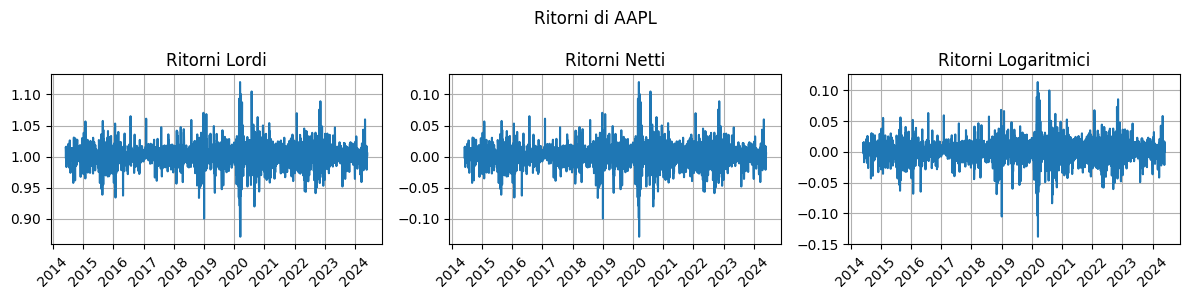

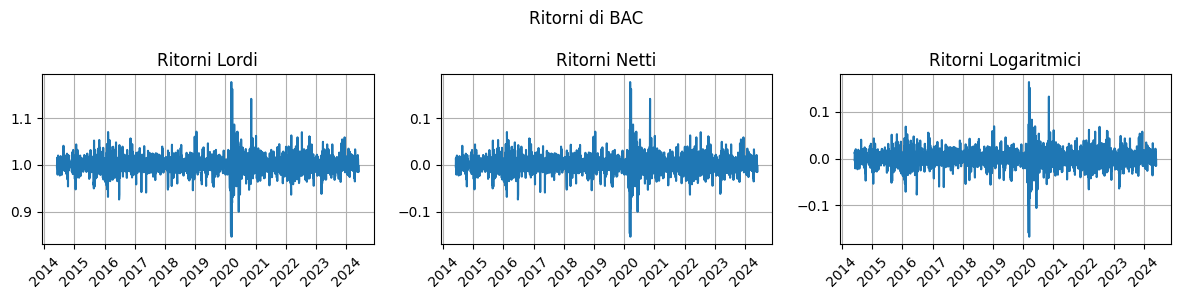

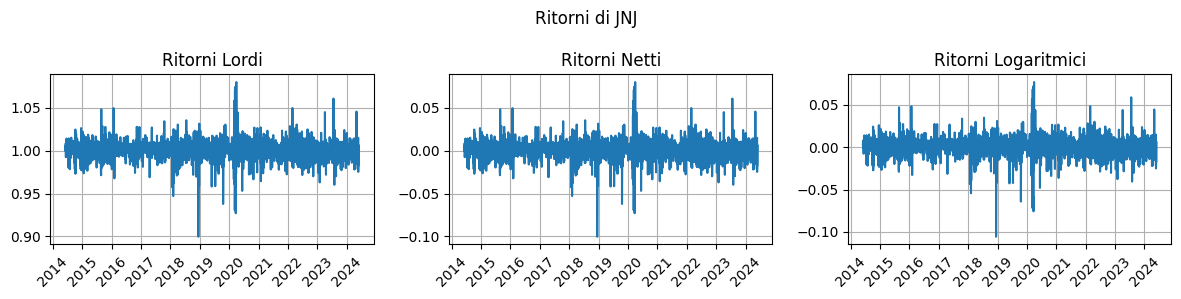

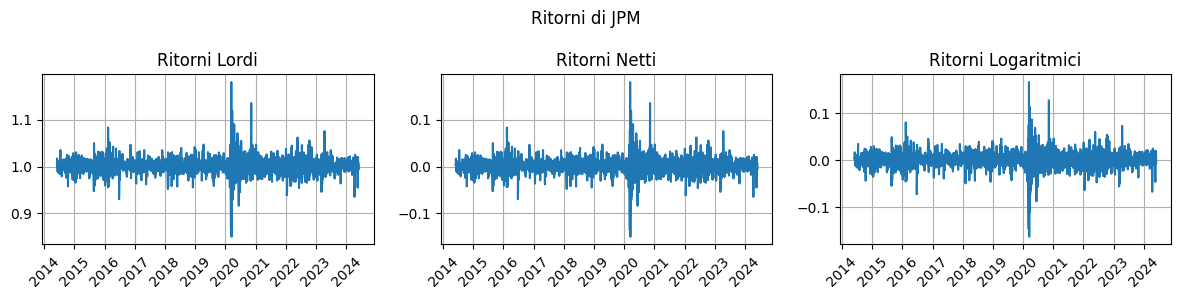

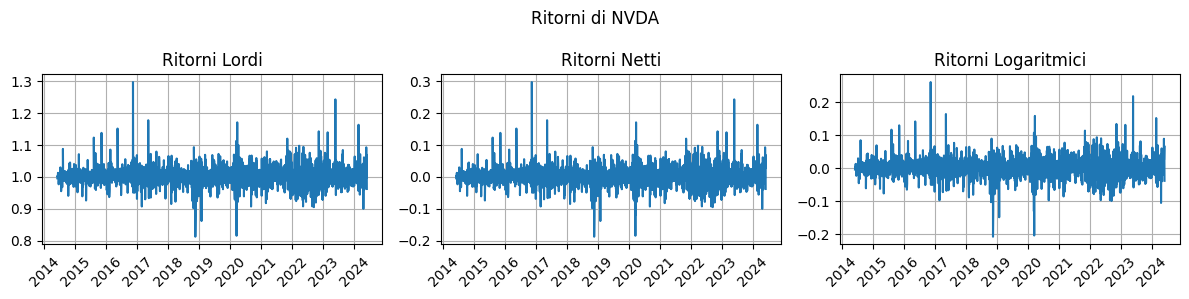

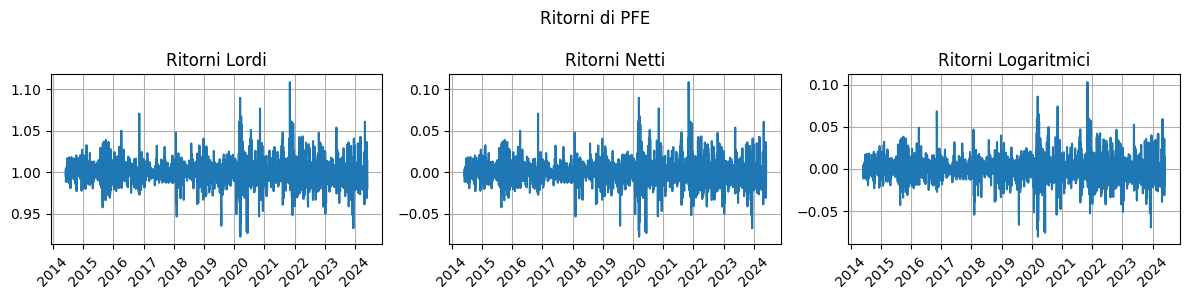

In [386]:
for ticker in daily_RS_gross.columns:
    fig, axs = plt.subplots(1,3, figsize=(12,3))
    fig.suptitle(f'Ritorni di {ticker}')
    axs[0].plot(daily_RS_gross[ticker])
    axs[0].set_title('Ritorni Lordi')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()
    axs[1].plot(daily_RS_net[ticker])
    axs[1].set_title('Ritorni Netti')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()
    axs[2].plot(daily_RL[ticker])
    axs[2].set_title('Ritorni Logaritmici')
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].grid()
    plt.tight_layout()
    plt.show()

### Describe per ogni asset

In [387]:
aapl = daily_pct_change['AAPL']
aapl.describe()

count    2516.000000
mean        0.001060
std         0.017841
min        -0.128647
25%        -0.007315
50%         0.000821
75%         0.010141
max         0.119808
Name: AAPL, dtype: float64

In [388]:
nvda = daily_pct_change['NVDA']
nvda.describe()

count    2516.000000
mean        0.002629
std         0.029824
min        -0.187559
25%        -0.011624
50%         0.002391
75%         0.016955
max         0.298067
Name: NVDA, dtype: float64

In [389]:
jpm = daily_pct_change['JPM']
jpm.describe()

count    2516.000000
mean        0.000764
std         0.016972
min        -0.149649
25%        -0.007065
50%         0.000615
75%         0.008523
max         0.180125
Name: JPM, dtype: float64

In [390]:
bac = daily_pct_change['BAC']
bac.describe()

count    2516.000000
mean        0.000637
std         0.019474
min        -0.153974
25%        -0.009021
50%         0.000489
75%         0.010463
max         0.177962
Name: BAC, dtype: float64

In [391]:
jnj = daily_pct_change['JNJ']
jnj.describe()

count    2516.000000
mean        0.000313
std         0.011374
min        -0.100379
25%        -0.004920
50%         0.000293
75%         0.005979
max         0.079977
Name: JNJ, dtype: float64

In [392]:
pfe = daily_pct_change['PFE']
pfe.describe()

count    2516.000000
mean        0.000255
std         0.014380
min        -0.077346
25%        -0.006703
50%         0.000000
75%         0.007036
max         0.108552
Name: PFE, dtype: float64

### Grafici a 3 sezioni per ogni azione

Calcolo il numero corretto di colonne utilizzando la formula di Freedman-Diaconis

In [393]:
from scipy import stats

bins = (np.max(aapl, axis = 0) - np.min(aapl, axis = 0)) / (2*stats.iqr(aapl, axis = 0) / np.power(len(aapl), 1.0/3))
bins = int(bins)

bins

96

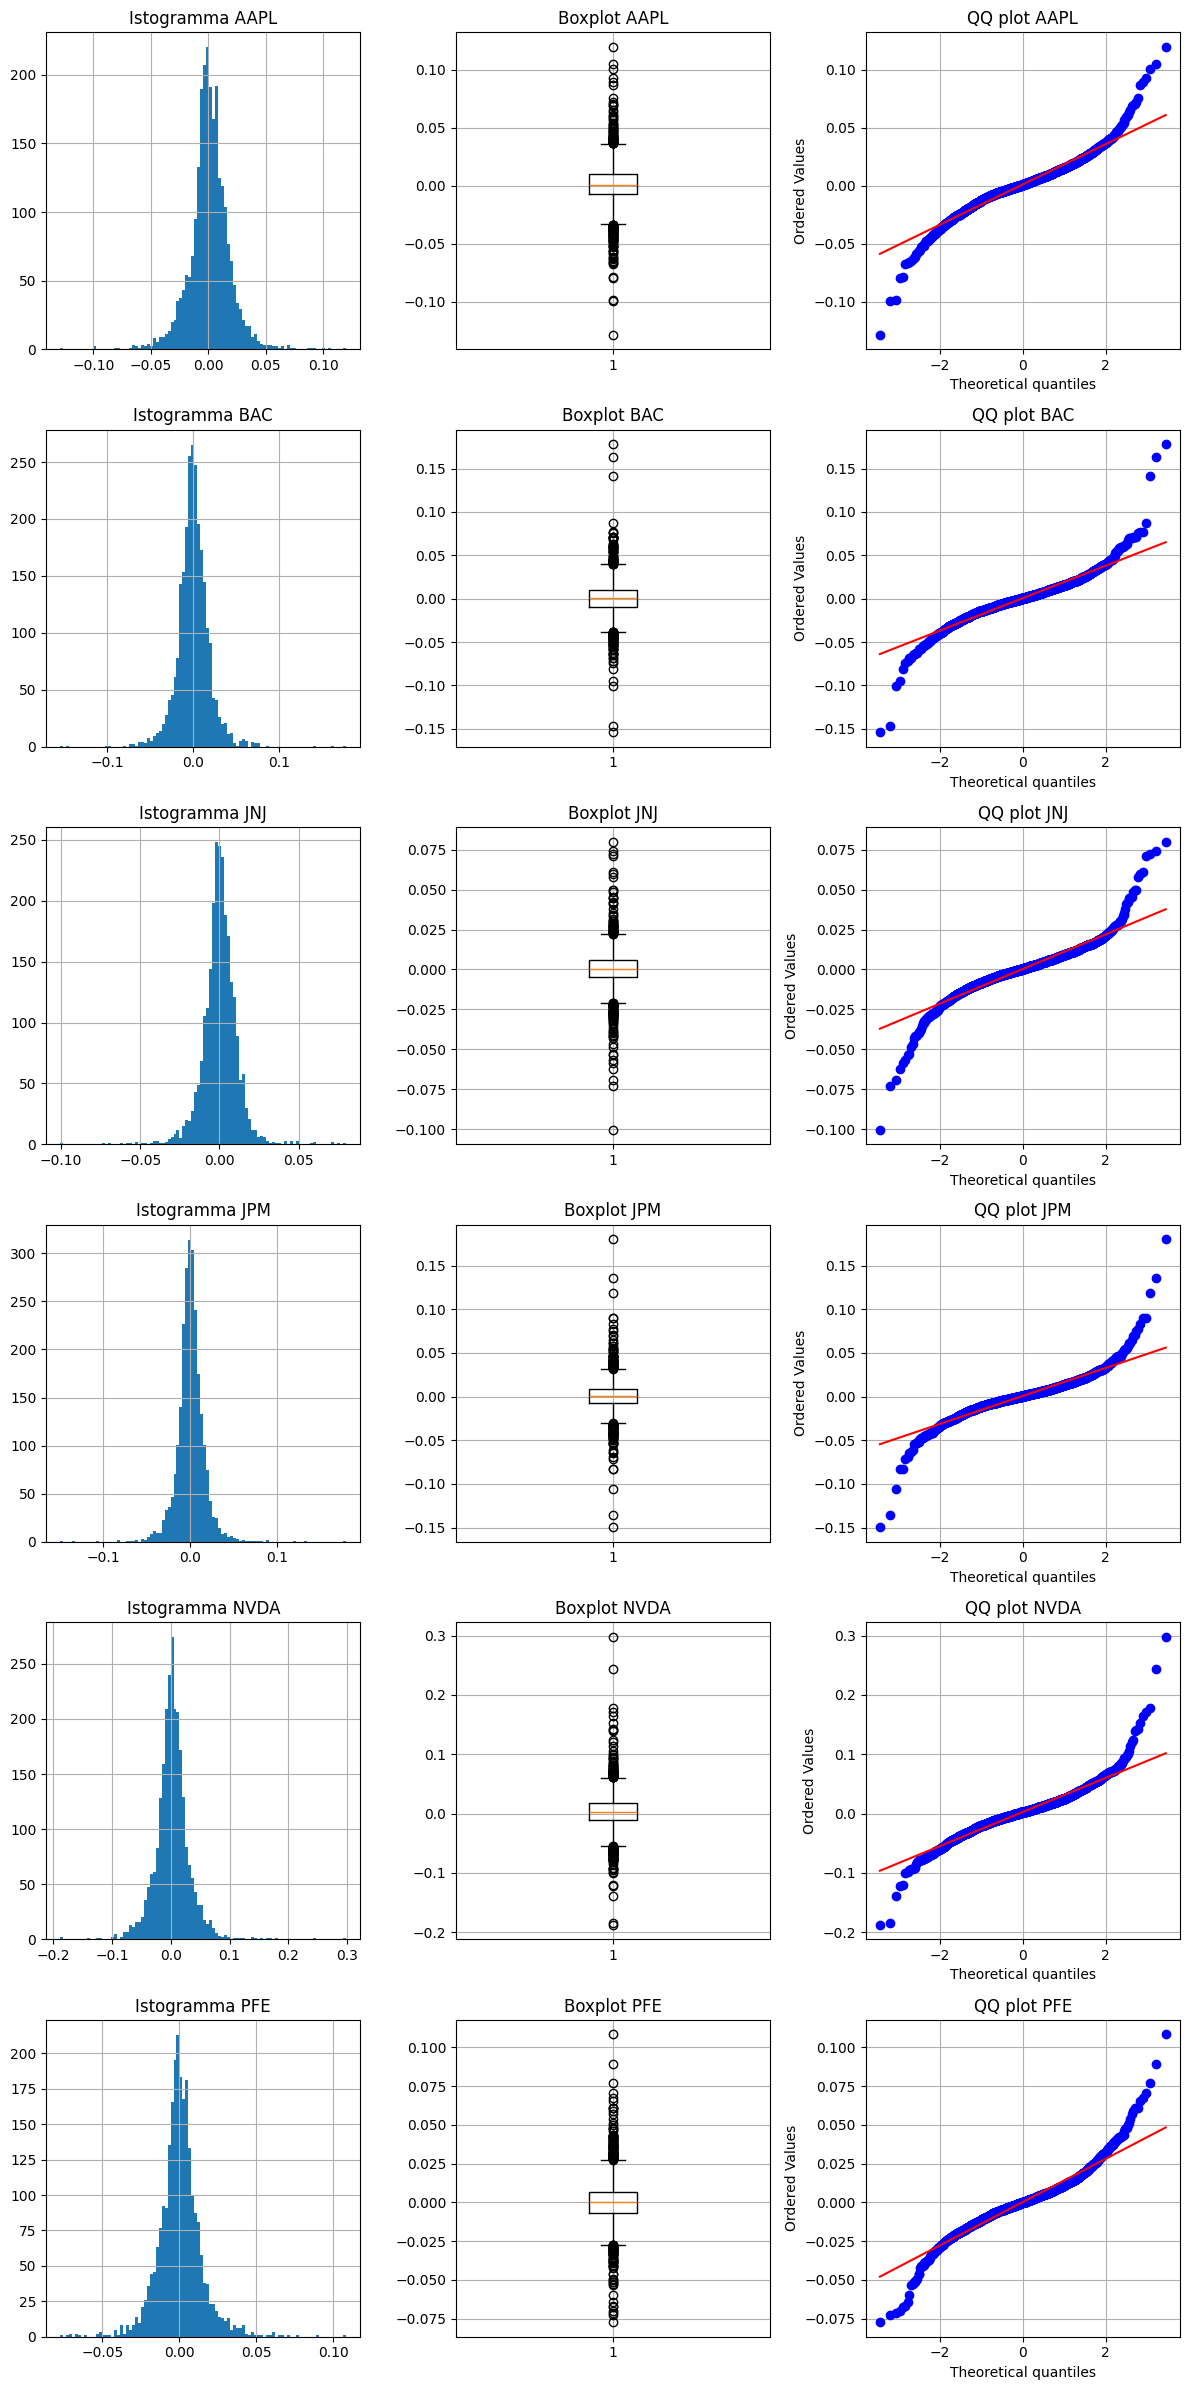

In [394]:
fig, axs = plt.subplots(6,3, figsize=(12,24))
for i, ticker in enumerate(daily_pct_change.columns):
    axs[i,0].hist(daily_pct_change[ticker], bins=bins)
    axs[i,0].set_title(f'Istogramma {ticker}')
    axs[i,0].grid()
    axs[i,1].boxplot(daily_pct_change[ticker])
    axs[i,1].set_title(f'Boxplot {ticker}')
    axs[i,1].grid()
    stats.probplot(daily_pct_change[ticker], dist='norm', plot=axs[i,2])
    axs[i,2].set_title(f'QQ plot {ticker}')
    axs[i,2].grid()
plt.tight_layout()
plt.show()

### Statistiche descrittive univariate

Calcolo media, varianza, deviazione standard, asimmetria e curtosi per ogni asset

In [395]:
from scipy.stats import skew, kurtosis

def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

    stats['Mean'] = df.mean()
    stats['Variance'] = df.var()
    stats['Standard Deviation'] = df.std()
    stats['Skewness'] = df.apply(skew)
    stats['Kurtosis'] = df.apply(kurtosis)

    return stats

calculate_statistics(daily_pct_change)

Mean  Variance  Standard Deviation  Skewness   Kurtosis
Ticker                                                             
AAPL    0.001060  0.000318            0.017841 -0.018286   5.347806
BAC     0.000637  0.000379            0.019474  0.282623  10.075074
JNJ     0.000313  0.000129            0.011374 -0.175335   9.342223
JPM     0.000764  0.000288            0.016972  0.297476  14.082739
NVDA    0.002629  0.000889            0.029824  0.689949   9.250453
PFE     0.000255  0.000207            0.014380  0.303752   5.301885

### Matrice di varianze/covarianze e Correlazione dei rendimenti

In [396]:
cov_matrix = daily_RS_net.cov()
cov_matrix

Ticker      AAPL       BAC       JNJ       JPM      NVDA       PFE
Ticker                                                            
AAPL    0.000318  0.000146  0.000074  0.000131  0.000289  0.000079
BAC     0.000146  0.000379  0.000083  0.000296  0.000197  0.000098
JNJ     0.000074  0.000083  0.000129  0.000080  0.000069  0.000086
JPM     0.000131  0.000296  0.000080  0.000288  0.000175  0.000093
NVDA    0.000289  0.000197  0.000069  0.000175  0.000889  0.000080
PFE     0.000079  0.000098  0.000086  0.000093  0.000080  0.000207

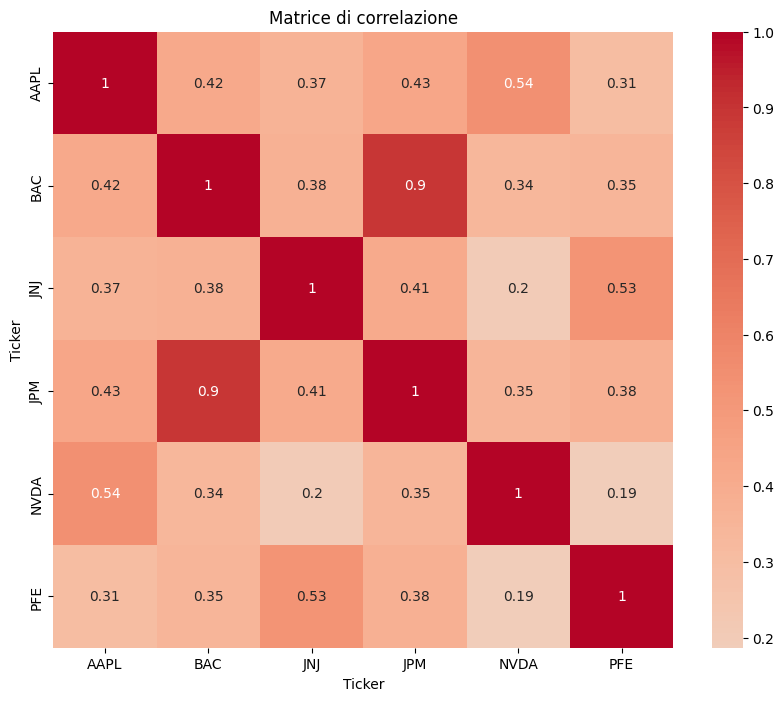

In [397]:
import seaborn as sns
corr_matrix = daily_RS_net.corr()
corr_matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione')
plt.show()

### Grafici di correlazione

#### Settore Tecnologia

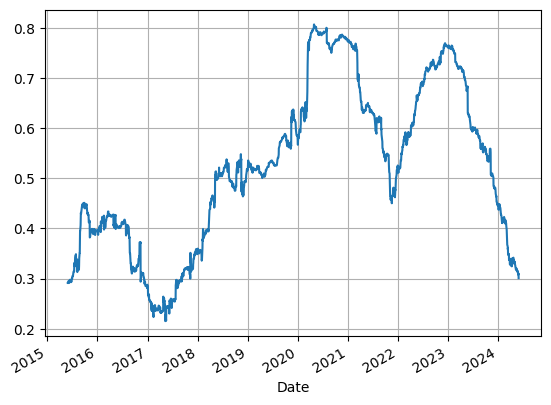

In [398]:
daily_pct_change['AAPL'].rolling(250).corr(daily_pct_change['NVDA']).plot()
plt.grid()

#### Settore Finanziario

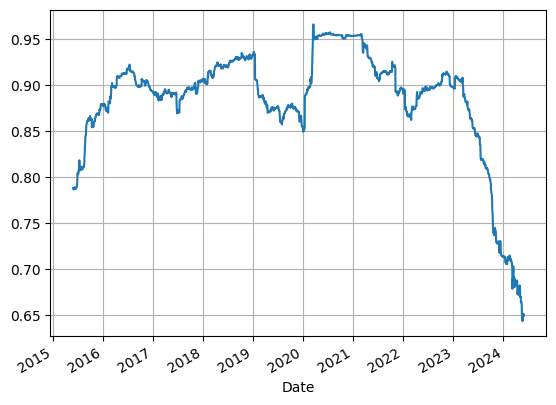

In [399]:
daily_pct_change['JPM'].rolling(250).corr(daily_pct_change['BAC']).plot()
plt.grid()

#### Settore Salute

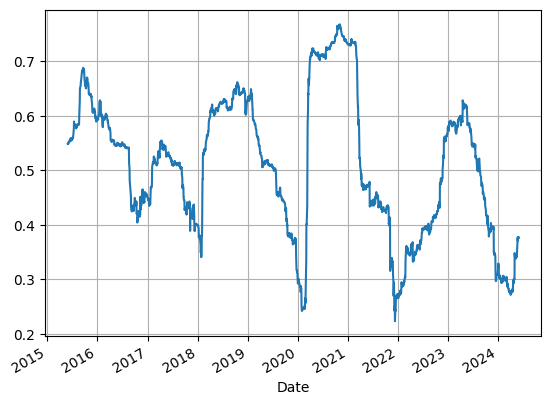

In [400]:
daily_pct_change['JNJ'].rolling(250).corr(daily_pct_change['PFE']).plot()
plt.grid()

### Grafici di Dispersione

In [401]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

#### Settore Tecnologia

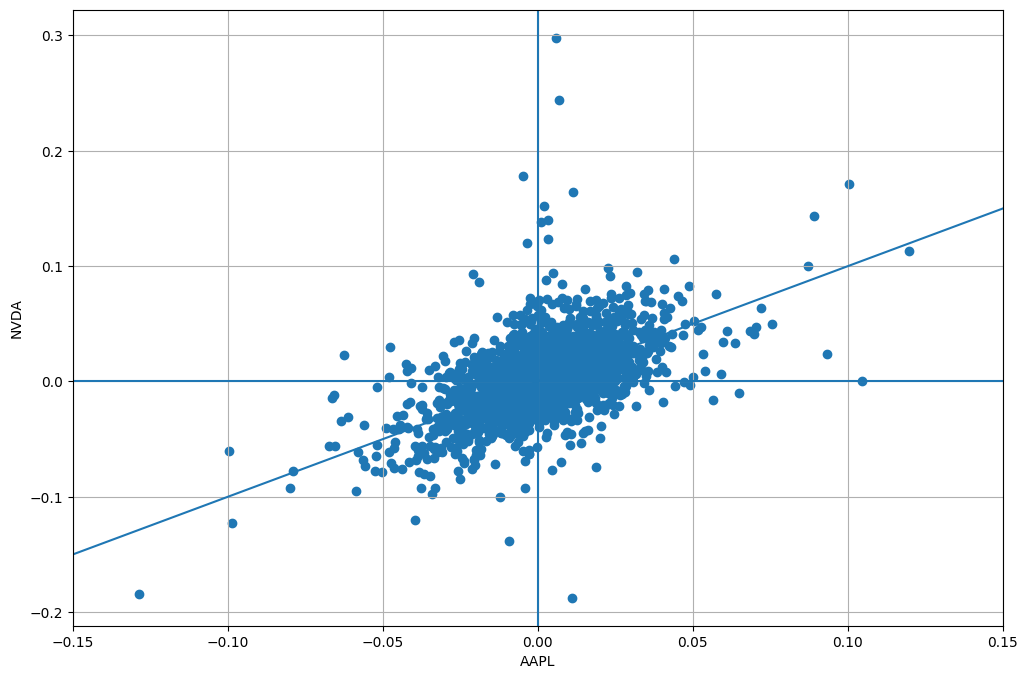

In [402]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'AAPL', 'NVDA', xlim=limits)
plt.grid()

#### Settore Finanziario

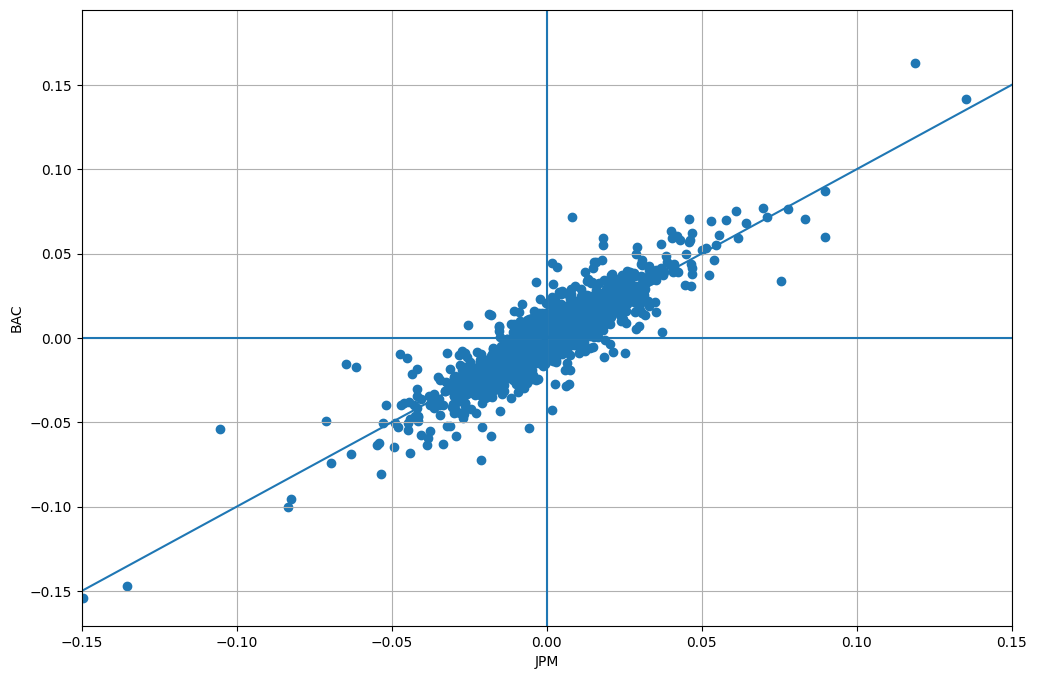

In [403]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JPM', 'BAC', xlim=limits)
plt.grid()

#### Settore Salute

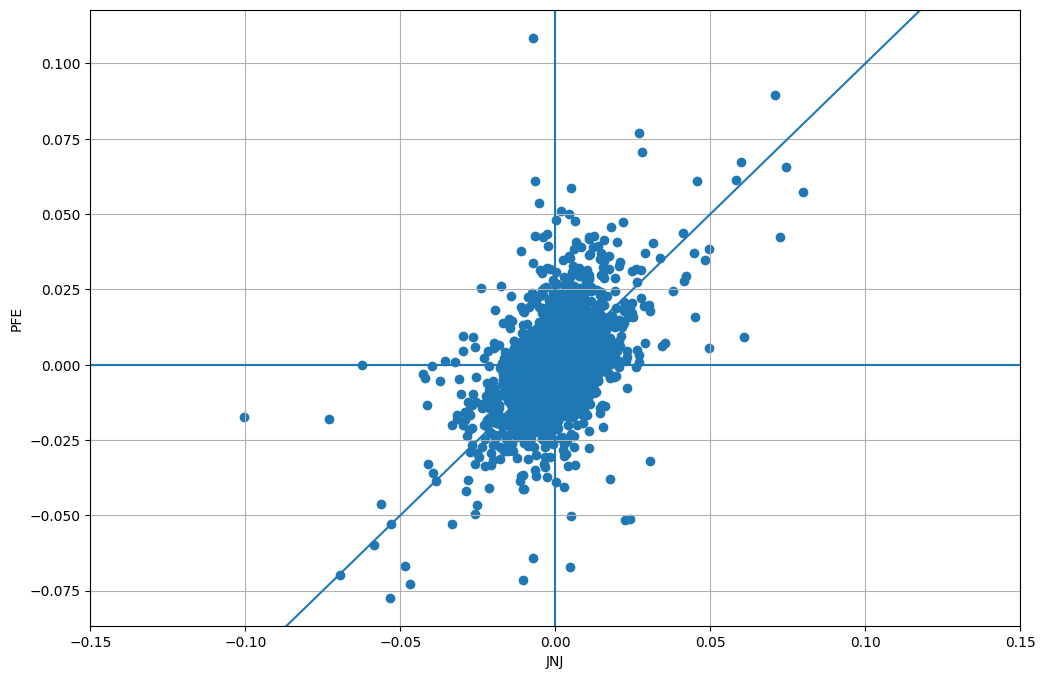

In [404]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JNJ', 'PFE', xlim=limits)
plt.grid()

#### Matrice di scatter plot

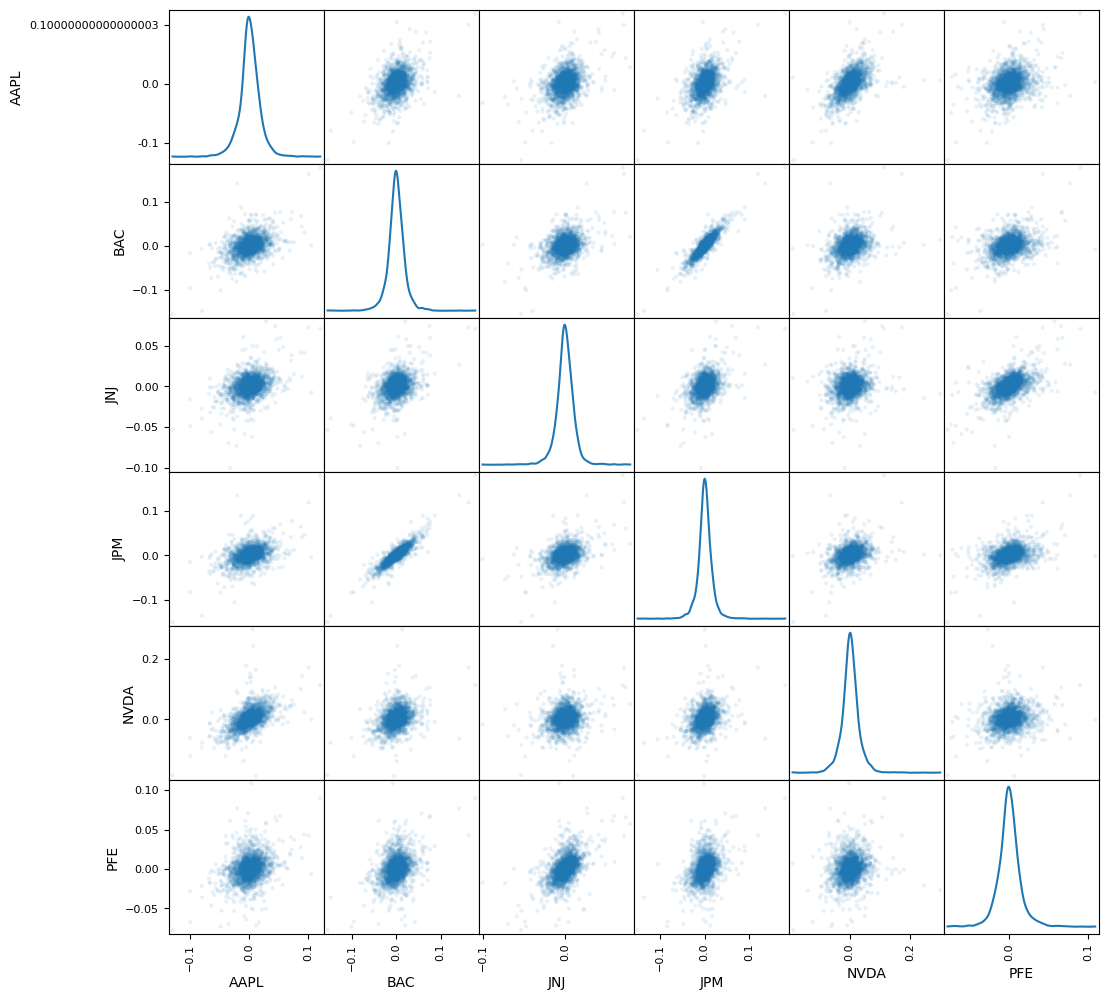

In [405]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))

## 3 - Analisi di Previsione

### Split data function

In [406]:
import numpy as np
import matplotlib.pyplot as plt

In [407]:
def split_data(df, train_months=80, validation_months=30, test_months=10):
    total_months = train_months + validation_months + test_months
    days_in_month = round(len(df) / total_months)

    train_days = train_months * days_in_month
    validation_days = validation_months * days_in_month

    train_df = df.iloc[:train_days]
    validation_df = df.iloc[train_days:train_days + validation_days]
    test_df = df.iloc[train_days + validation_days:]

    return train_df, validation_df, test_df

In [408]:
# Suddivisione dei dati
train_df, validation_df, test_df = split_data(daily_close_px)

### SARIMAX grid search function

In [409]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings, os, json
from tqdm import tqdm

warnings.filterwarnings("ignore")

In [410]:
# Funzione per eseguire grid search su parametri SARIMAX
def sarimax_grid_search(train_df, validation_df, ticker, pdq_range=(0, 2), s_range=[4, 6, 12]):
    # Controllo se esiste il file json con i risultati
    if os.path.exists(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"):
        json_dict = json.load(open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"))
        return (json_dict["order"], json_dict["seasonal_order"], json_dict["mse"])

    p = d = q = range(pdq_range[0], pdq_range[1])
    param_combinations = list(itertools.product(p, d, q))
    best_model, lowest_mse = None, None

    total_iterations = len(param_combinations) * len(list(itertools.product(p, d, q, s_range)))

    with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
        for order in param_combinations:
            for seasonal_order in itertools.product(p, d, q, s_range):
                try:
                    model = SARIMAX(train_df, order=order, seasonal_order=seasonal_order,
                                    enforce_stationarity=False, enforce_invertibility=False)
                    model_result = model.fit(disp=False) # maxiter=200
                    forecast = model_result.forecast(steps=len(validation_df))
                    mse = mean_squared_error(validation_df, forecast)
                    
                    if not lowest_mse or mse < lowest_mse:
                        lowest_mse = mse
                        best_model = (order, seasonal_order, mse)
                except Exception as ex:
                    continue
                pbar.update(1)

    # Creo la cartella se non esiste
    if not os.path.exists("data/SARIMAX_configs"):
        os.makedirs("data/SARIMAX_configs")
    # Salvo i risultati su file json
    json.dump({
        "order": best_model[0],
        "seasonal_order": best_model[1],
        "mse": best_model[2]
    }, open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json", "w"))

    return best_model

### Cerco la miglior configurazione per ogni asset

In [411]:
# find the best model for each stock
best_models = {}
for ticker in daily_close_px.columns:
    print(f"\nGrid search for {ticker}...")
    order, seasonal_order, mse = sarimax_grid_search(train_df[ticker], validation_df[ticker], ticker)
    best_models[ticker] = {
        "order": order,
        "seasonal_order": seasonal_order,
        "mse": mse
    }
    print('SARIMAX {}x{}'.format(order, seasonal_order))
    print('Lowest RMSE: %.3f'%np.sqrt(mse))


Grid search for AAPL...
SARIMAX [0, 0, 0]x[1, 1, 0, 6]
Lowest RMSE: 23.810

Grid search for BAC...
SARIMAX [0, 0, 1]x[1, 0, 1, 12]
Lowest RMSE: 7.152

Grid search for JNJ...
SARIMAX [1, 0, 1]x[1, 1, 1, 4]
Lowest RMSE: 8.031

Grid search for JPM...
SARIMAX [0, 0, 1]x[1, 0, 1, 4]
Lowest RMSE: 18.352

Grid search for NVDA...
SARIMAX [1, 0, 0]x[0, 0, 1, 12]
Lowest RMSE: 7.135

Grid search for PFE...
SARIMAX [0, 0, 1]x[1, 0, 1, 6]
Lowest RMSE: 8.509


### SARIMAX Results

In [412]:
models = {}
for ticker in daily_close_px.columns:
    order = best_models[ticker]['order']
    seasonal_order = best_models[ticker]['seasonal_order']
    model = SARIMAX(np.append(train_df[ticker], validation_df[ticker]),
                    order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_result = model.fit(disp=False)
    models[ticker] = model_result

#### AAPL

In [413]:
print(models['AAPL'].summary())

                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                 2310
Model:             SARIMAX(1, 1, 0, 6)   Log Likelihood               -6392.338
Date:                 Wed, 10 Jul 2024   AIC                          12788.676
Time:                         16:37:34   BIC                          12800.156
Sample:                              0   HQIC                         12792.862
                                - 2310                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6        0.0171      0.014      1.229      0.219      -0.010       0.044
sigma2        15.2643      0.264     57.827      0.000      14.747      15.782
Ljung-Box (L1) (Q):                1465.39  

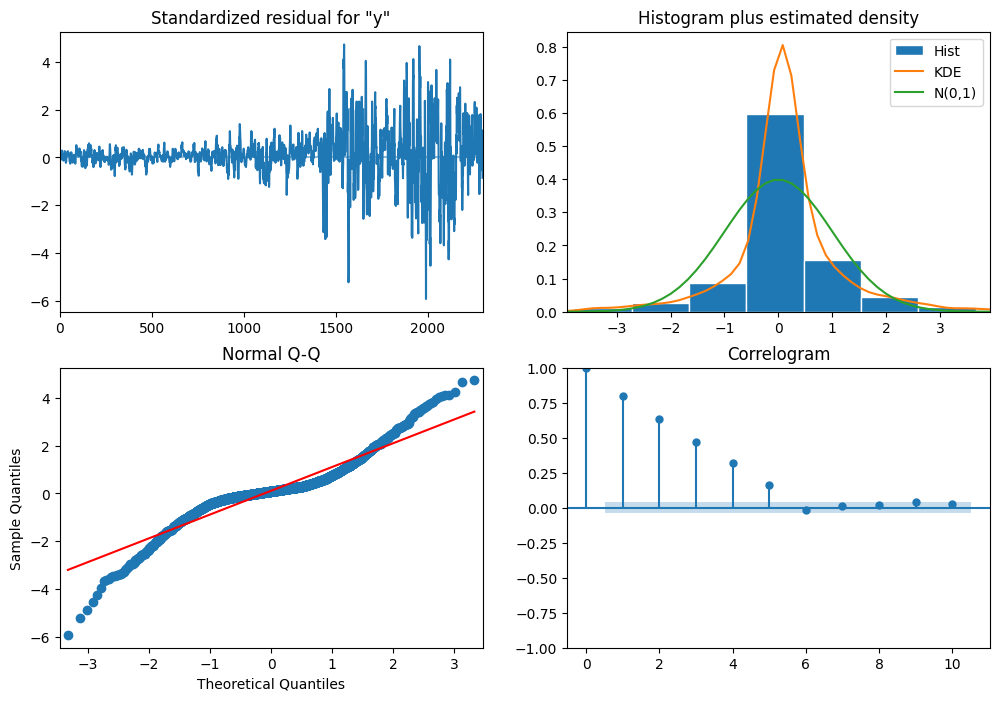

In [414]:
models['AAPL'].plot_diagnostics(figsize=(12,8));

#### NVDA

In [415]:
print(models['NVDA'].summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1339.465
Date:                              Wed, 10 Jul 2024   AIC                           2684.929
Time:                                      16:37:35   BIC                           2702.147
Sample:                                           0   HQIC                          2691.207
                                             - 2310                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0020      0.000   2576.647      0.000       1.001       1.003
ma.S.L12      26.87

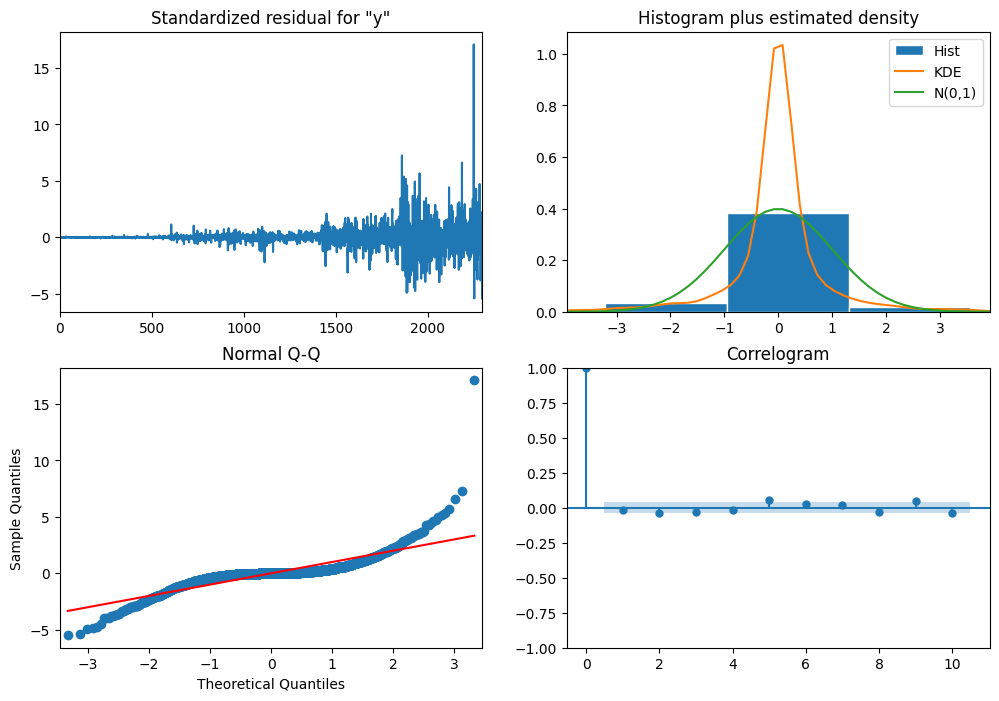

In [416]:
models['NVDA'].plot_diagnostics(figsize=(12,8));

#### JPM

In [417]:
print(models['JPM'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -5303.672
Date:                           Wed, 10 Jul 2024   AIC                          10615.345
Time:                                   16:37:35   BIC                          10638.314
Sample:                                        0   HQIC                         10623.718
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2689      0.010    127.122      0.000       1.249       1.288
ar.S.L4        1.0013      0.001   1382.585

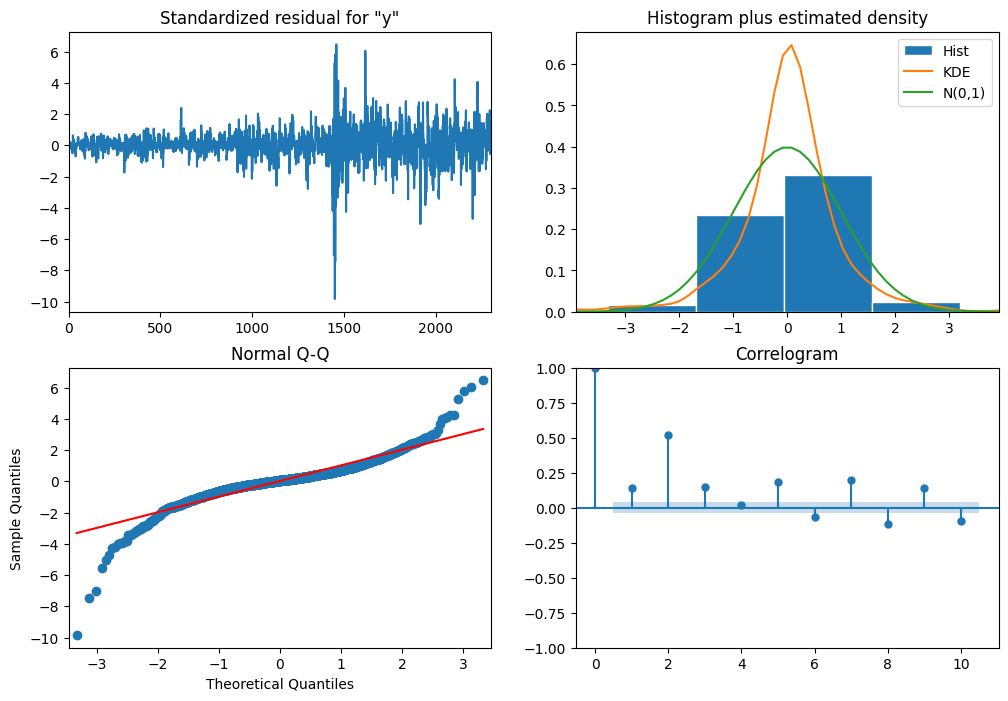

In [418]:
models['JPM'].plot_diagnostics(figsize=(12,8));

#### BAC

In [419]:
print(models['BAC'].summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -3479.203
Date:                            Wed, 10 Jul 2024   AIC                           6966.407
Time:                                    16:37:36   BIC                           6989.362
Sample:                                         0   HQIC                          6974.777
                                           - 2310                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2154      0.012    101.435      0.000       1.192       1.239
ar.S.L12       1.0009      0.001   

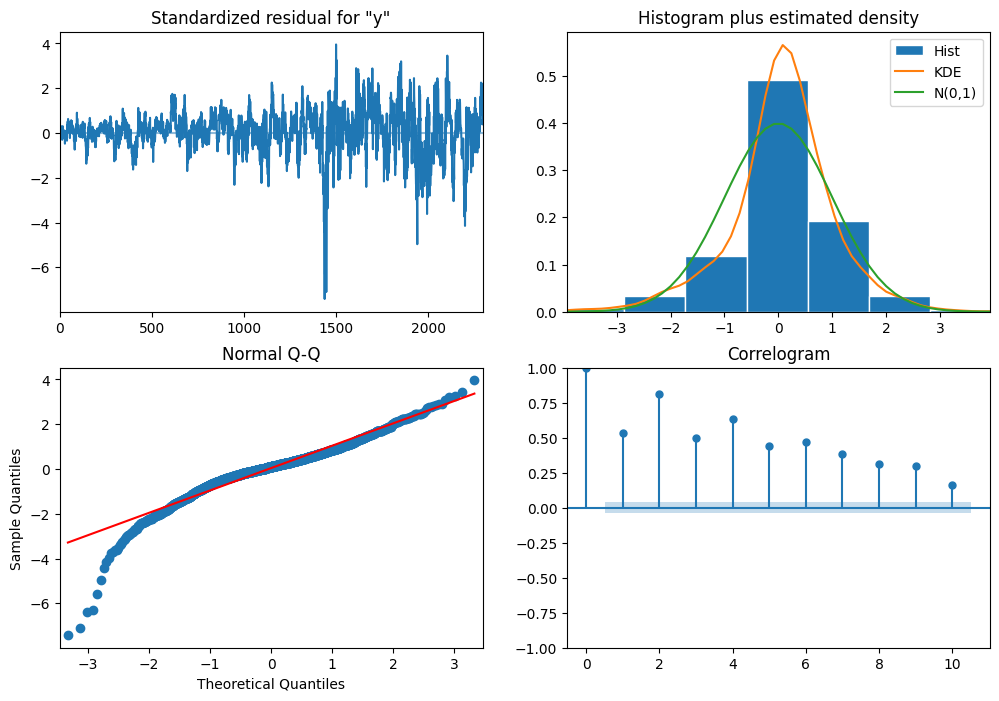

In [420]:
models['BAC'].plot_diagnostics(figsize=(12,8));

#### JNJ

In [421]:
print(models['JNJ'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 4)   Log Likelihood               -4053.480
Date:                           Wed, 10 Jul 2024   AIC                           8116.960
Time:                                   16:37:36   BIC                           8145.663
Sample:                                        0   HQIC                          8127.425
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001   1054.158      0.000       0.997       1.001
ma.L1         -0.0754      0.011     -6.865

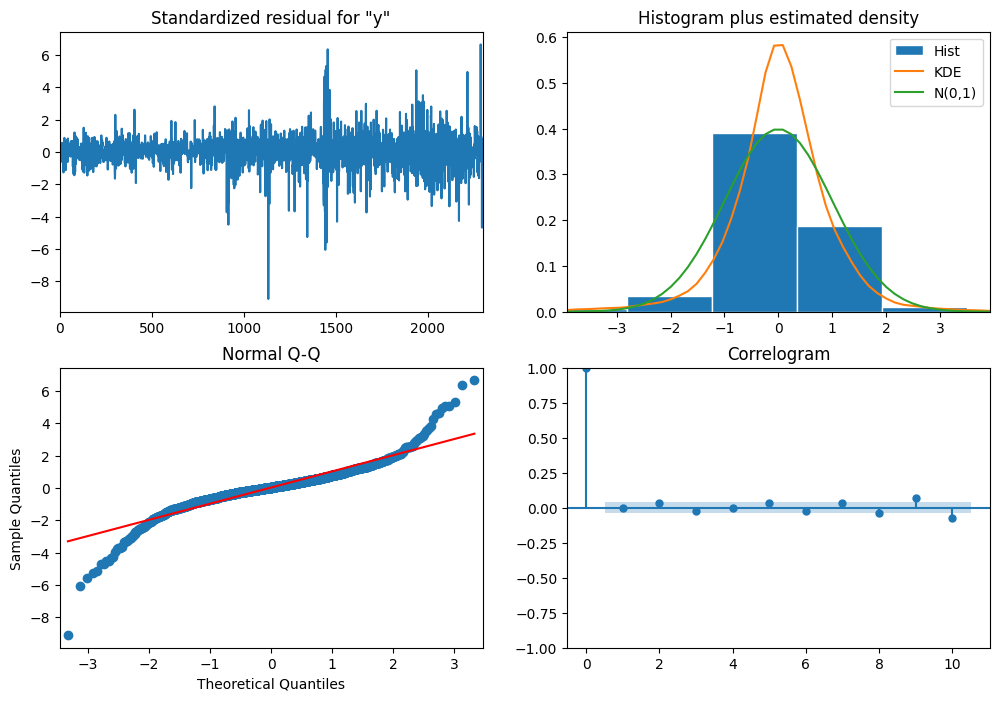

In [422]:
models['JNJ'].plot_diagnostics(figsize=(12,8));

#### PFE

In [423]:
print(models['PFE'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 6)   Log Likelihood               -2830.614
Date:                           Wed, 10 Jul 2024   AIC                           5669.229
Time:                                   16:37:37   BIC                           5692.195
Sample:                                        0   HQIC                          5677.601
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8733      0.006    143.138      0.000       0.861       0.885
ar.S.L6        1.0002      0.001   1378.938

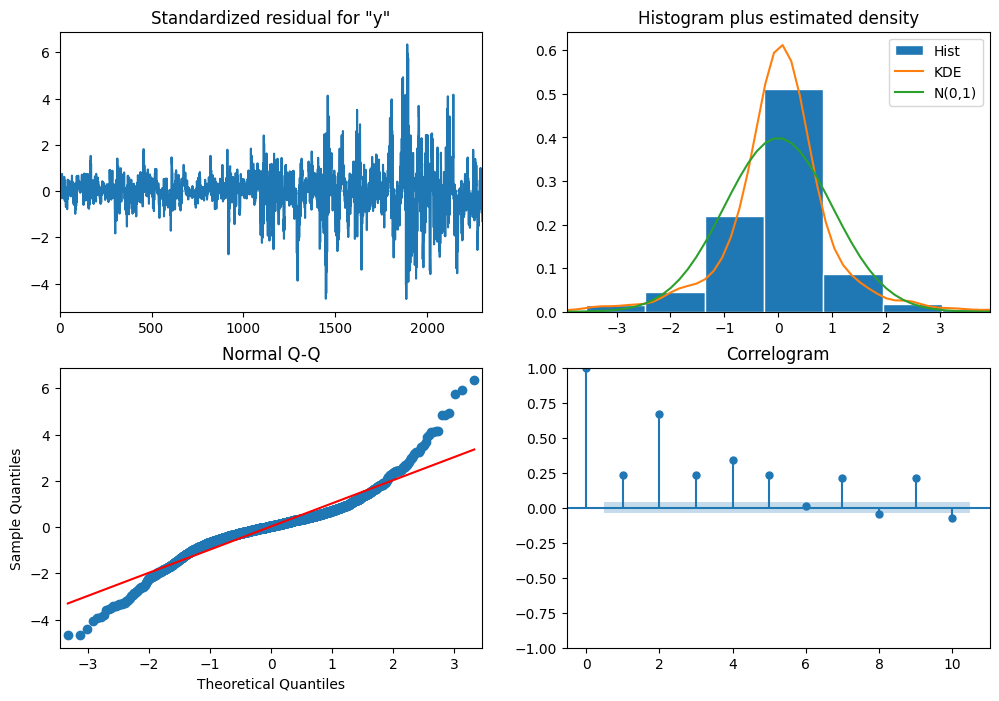

In [424]:
models['PFE'].plot_diagnostics(figsize=(12,8));

### Previsioni con SARIMAX

In [425]:
if os.path.exists(f"data/SARIMAX_configs/SARIMAX_predictions.json"):
    models_predictions = json.load(open(f"data/SARIMAX_configs/SARIMAX_predictions.json"))
else:
    models_predictions = {
        'AAPL': [],
        'NVDA': [],
        'JPM': [],
        'BAC': [],
        'JNJ': [],
        'PFE': []
    }

    total_iterations = len(test_df) * len(daily_close_px.columns)

    with tqdm(total=total_iterations, desc="Forecast Progress", ncols=100) as pbar:
        for ticker in daily_close_px.columns:
            model_fit = models[ticker]
            train_validation_df = np.append(train_df[ticker], validation_df[ticker])

            for i in range(len(test_df[ticker])):
                forecast = model_fit.forecast(steps=1)
                models_predictions[ticker].append(forecast[0])

                train_validation_df = np.append(train_validation_df, test_df[ticker].iloc[i])
                model = SARIMAX(train_validation_df, order=best_models[ticker]['order'],
                                seasonal_order=best_models[ticker]['seasonal_order'],
                                enforce_stationarity=False, enforce_invertibility=False)
                
                model_fit = model.fit(disp=False)

                pbar.update(1)

    json.dump(models_predictions, open(f"data/SARIMAX_configs/SARIMAX_predictions.json", "w"))

#### AAPL

In [426]:
mse = mean_squared_error(test_df['AAPL'], models_predictions['AAPL'])
print(f"AAPL MSE: {mse}")
print(f"AAPL RMSE: {np.sqrt(mse)}")

AAPL MSE: 42.93918078784455
AAPL RMSE: 6.552799461897529


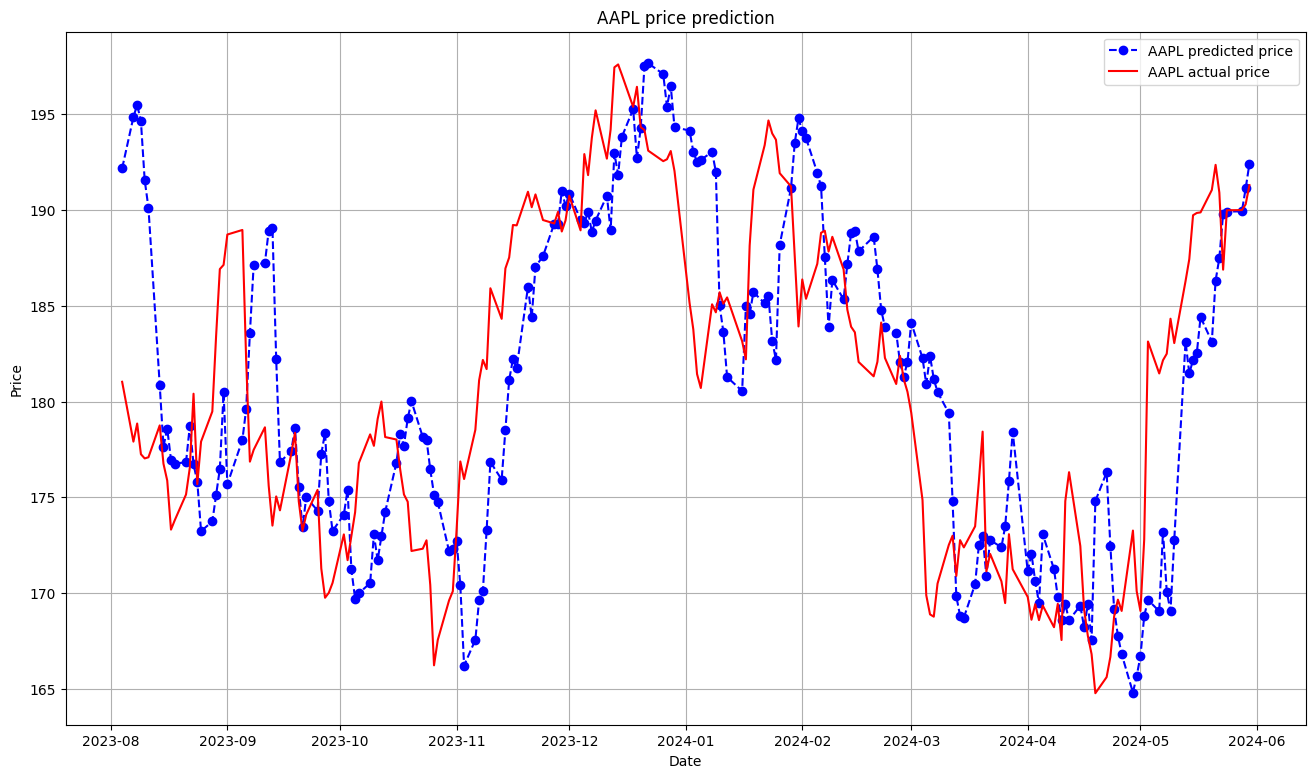

In [427]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['AAPL'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'AAPL predicted price' )
plt.plot(date_range, list(test_df['AAPL']), color = 'red', label = 'AAPL actual price' )
plt.title('AAPL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### NVDA

In [428]:
mse = mean_squared_error(test_df['NVDA'], models_predictions['NVDA'])
print(f"NVDA MSE: {mse}")
print(f"NVDA RMSE: {np.sqrt(mse)}")

NVDA MSE: 4.202460527354094
NVDA RMSE: 2.0499903725027817


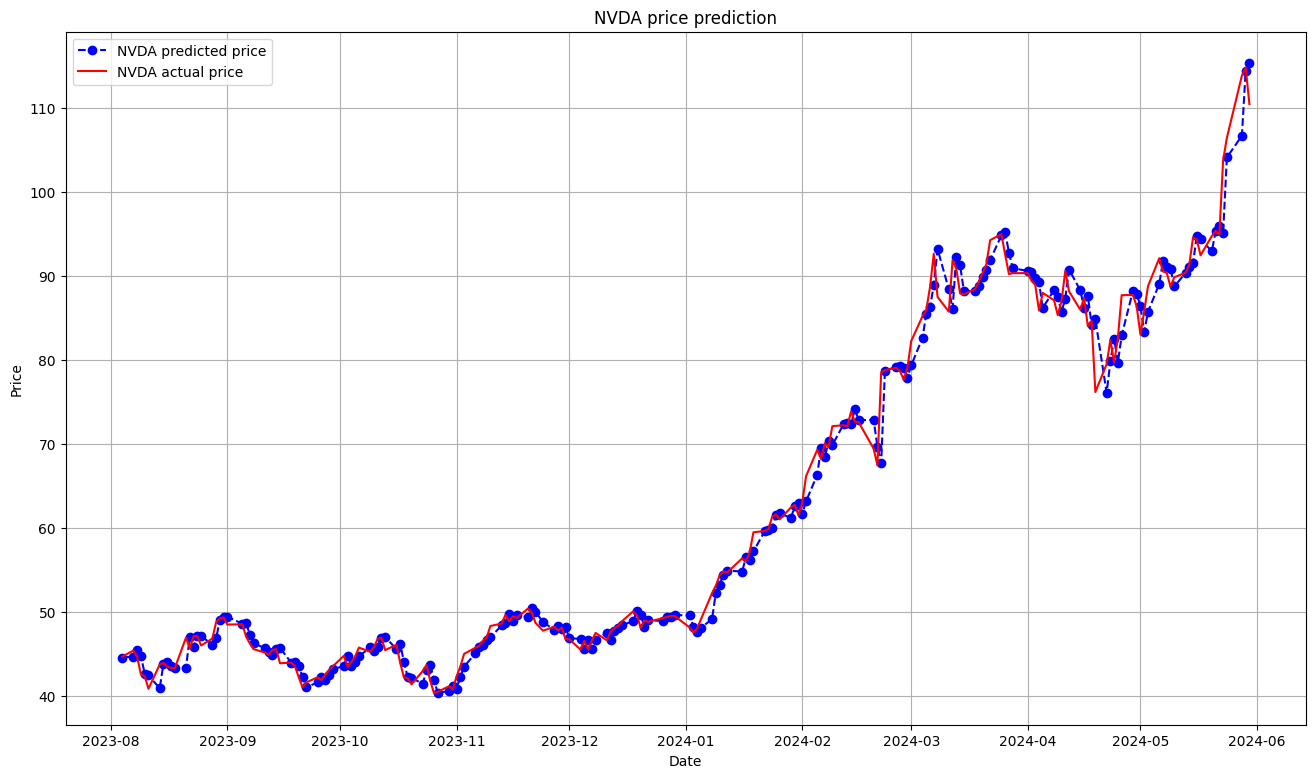

In [429]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['NVDA'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'NVDA predicted price' )
plt.plot(date_range, list(test_df['NVDA']), color = 'red', label = 'NVDA actual price' )
plt.title('NVDA price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JPM

In [430]:
mse = mean_squared_error(test_df['JPM'], models_predictions['JPM'])
print(f"JPM MSE: {mse}")
print(f"JPM RMSE: {np.sqrt(mse)}")

JPM MSE: 9.886352848248448
JPM RMSE: 3.144257121841095


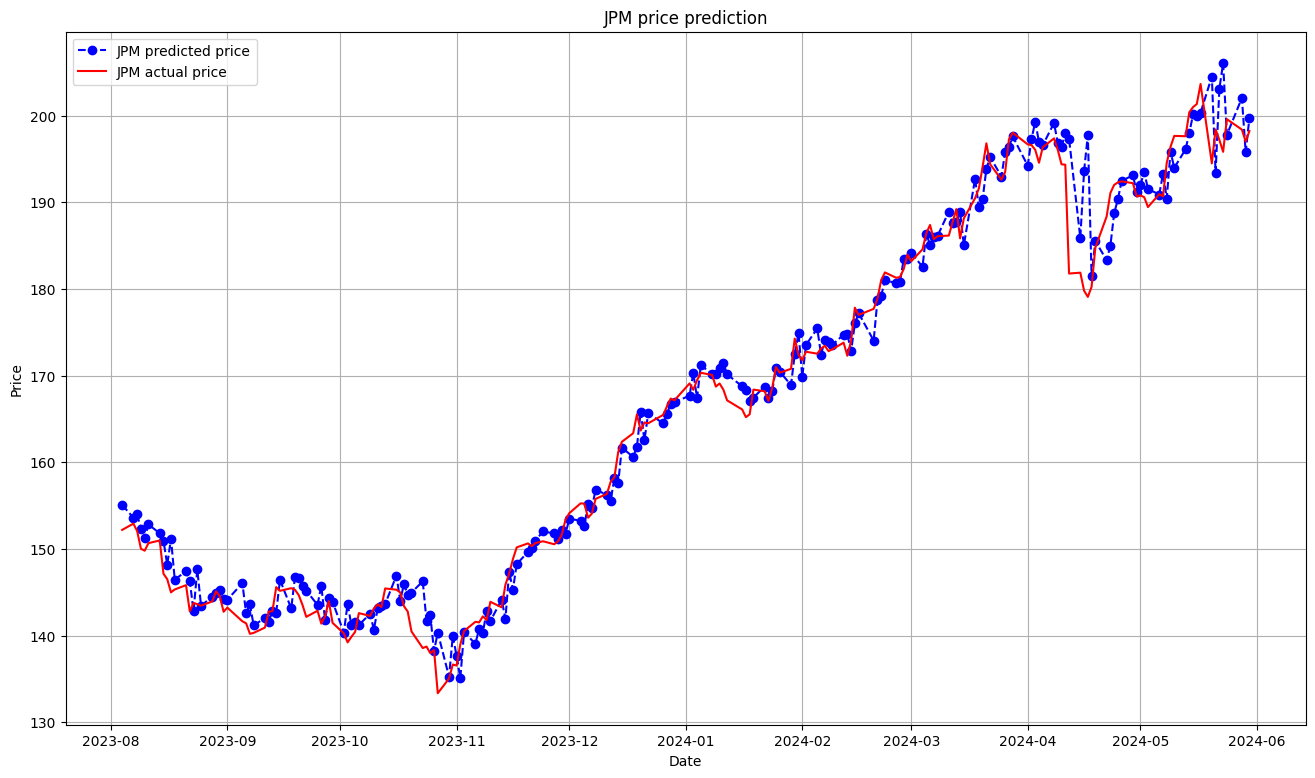

In [431]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JPM'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JPM predicted price' )
plt.plot(date_range, list(test_df['JPM']), color = 'red', label = 'JPM actual price' )
plt.title('JPM price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### BAC

In [432]:
mse = mean_squared_error(test_df['BAC'], models_predictions['BAC'])
print(f"BAC MSE: {mse}")
print(f"BAC RMSE: {np.sqrt(mse)}")

BAC MSE: 1.0922544969953754
BAC RMSE: 1.0451098014062328


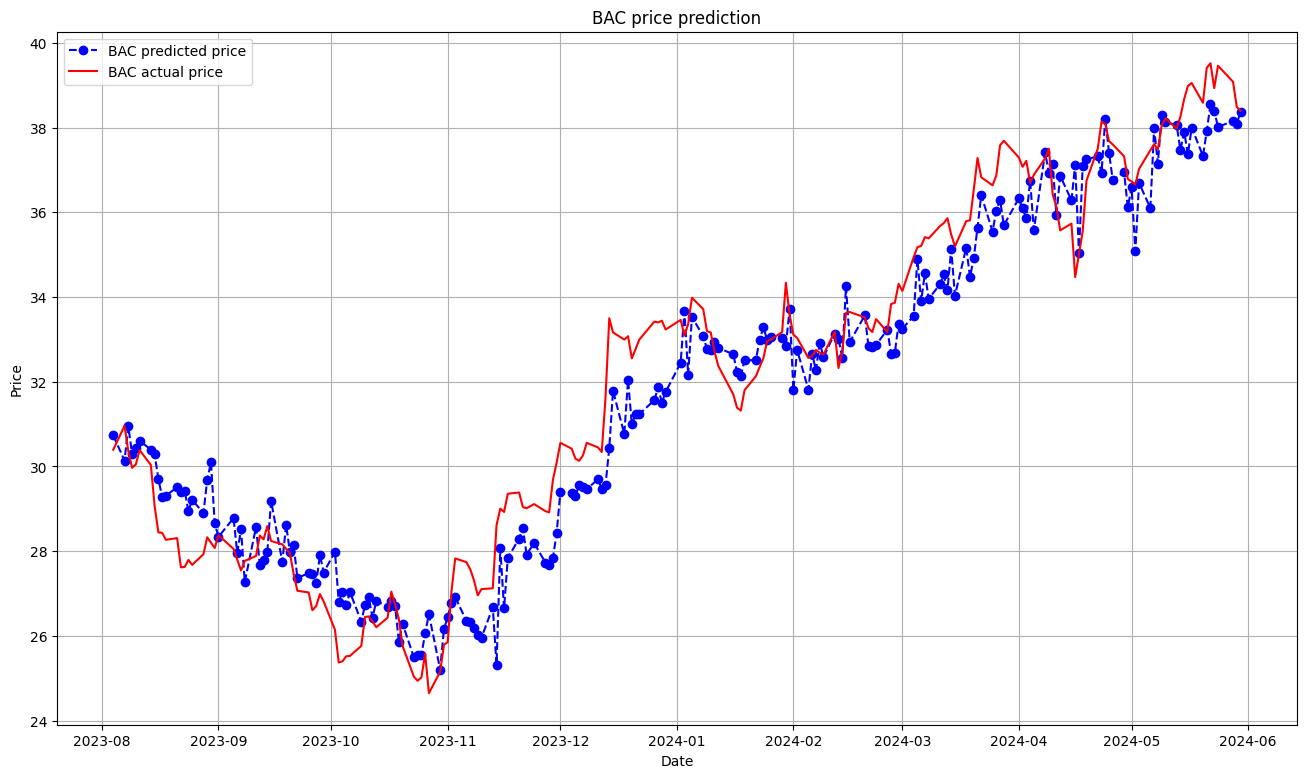

In [433]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['BAC'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BAC predicted price' )
plt.plot(date_range, list(test_df['BAC']), color = 'red', label = 'BAC actual price' )
plt.title('BAC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JNJ

In [434]:
mse = mean_squared_error(test_df['JNJ'], models_predictions['JNJ'])
print(f"JNJ MSE: {mse}")
print(f"JNJ RMSE: {np.sqrt(mse)}")

JNJ MSE: 2.159766919447189
JNJ RMSE: 1.4696145479162857


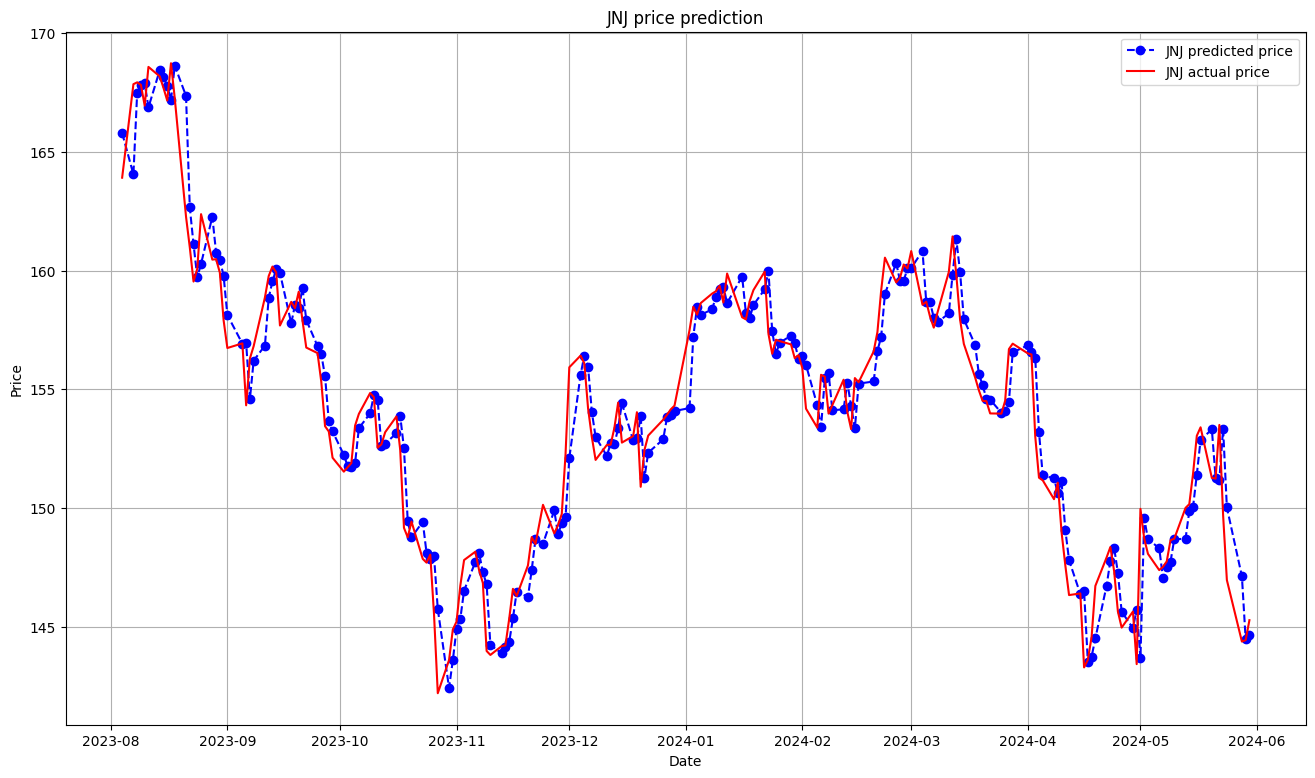

In [435]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JNJ'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JNJ predicted price' )
plt.plot(date_range, list(test_df['JNJ']), color = 'red', label = 'JNJ actual price' )
plt.title('JNJ price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### PFE

In [436]:
mse = mean_squared_error(test_df['PFE'], models_predictions['PFE'])
print(f"PFE MSE: {mse}")
print(f"PFE RMSE: {np.sqrt(mse)}")

PFE MSE: 0.6927332522315872
PFE RMSE: 0.8323059847385379


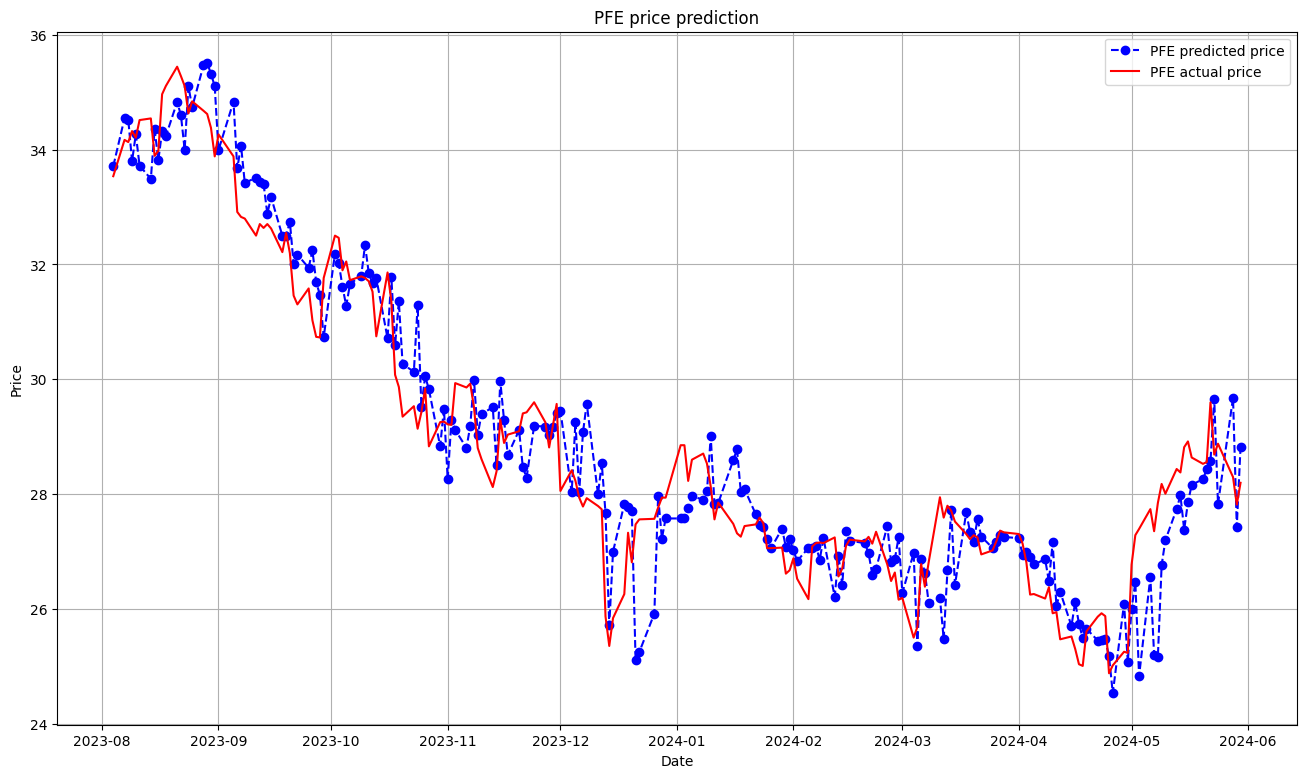

In [437]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['PFE'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'PFE predicted price' )
plt.plot(date_range, list(test_df['PFE']), color = 'red', label = 'PFE actual price' )
plt.title('PFE price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4 - Strategie di trading e backtesting

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm

In [439]:
# Caricamento dei dati
symbol = 'NVDA'
data = pd.DataFrame()
data[symbol] = daily_close_px[symbol]

In [440]:
# Suddivisione dei dati in training (80%) e test (20%)
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data[:split_index].copy()
test_data = data[split_index:].copy()

In [441]:
# Funzione di backtesting con parametri SMA
def backtest_strategy(data, SMA1, SMA2):
    data['SMA1'] = data[symbol].rolling(window=SMA1).mean()
    data['SMA2'] = data[symbol].rolling(window=SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
    data.dropna(inplace=True)
    return np.exp(data['Strategy'].sum())

In [442]:
# Definire il range dei parametri per il tuning
SMA1 = range(20, 61, 2)
SMA2 = range(180, 281, 2)

In [443]:
best_performance = -np.inf
best_params = None

total_iterations = len(SMA1) * len(SMA2)

# Effettuare la grid search sui dati di training
with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
    for SMA1, SMA2 in product(SMA1, SMA2):
        performance = backtest_strategy(train_data.copy(), SMA1, SMA2)
        if performance > best_performance:
            best_performance = performance
            best_params = {'SMA1': SMA1, 'SMA2': SMA2}
        pbar.update(1)

print("Best Performance on Training Data:", best_performance)
print("Best Parameters:", best_params)

Grid Search Progress: 100%|████████████████████████████████████| 1071/1071 [00:03<00:00, 281.81it/s]

Best Performance on Training Data: 54.559923419473435
Best Parameters: {'SMA1': 52, 'SMA2': 182}


In [444]:
# Valutare la strategia sui dati di test con i migliori parametri trovati
test_performance = backtest_strategy(test_data.copy(), best_params['SMA1'], best_params['SMA2'])
print("Performance on Test Data:", test_performance)

Performance on Test Data: 5.02473453177747


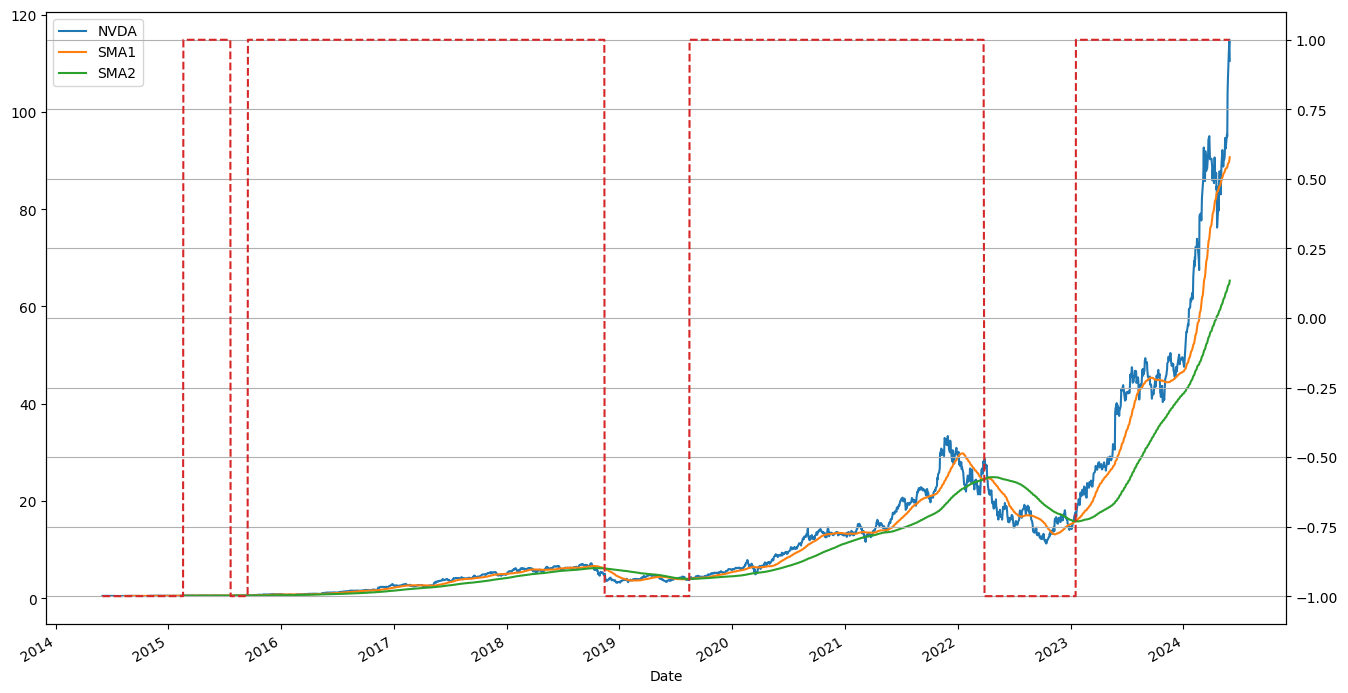

In [445]:
# Visualizzazione dei risultati sul'intero dataset
data['SMA1'] = data[symbol].rolling(window=best_params['SMA1']).mean()
data['SMA2'] = data[symbol].rolling(window=best_params['SMA2']).mean()
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

data[[symbol, 'SMA1', 'SMA2']].plot(figsize=(16,9))
data['Position'].plot(secondary_y='Position', style='--')
plt.grid()

In [446]:
# Calcolo la strategia su tutto il dataset
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
data.dropna(inplace=True)

In [447]:
# Calcolo delle metriche di performance
performance_metrics = {
    'Cumulative_Returns_Buy_and_Hold': np.exp(data['Returns'].sum()),
    'Cumulative_Returns_Strategy': np.exp(data['Strategy'].sum()),
    'Annualized_Returns_Buy_and_Hold': np.exp(data['Returns'].mean() * 252),
    'Annualized_Returns_Strategy': np.exp(data['Strategy'].mean() * 252),
    'Volatility_Buy_and_Hold': data['Returns'].std() * np.sqrt(252),
    'Volatility_Strategy': data['Strategy'].std() * np.sqrt(252)
}

for key, value in performance_metrics.items():
    print(f"{key}: {value}")

Cumulative_Returns_Buy_and_Hold: 208.08556503177513
Cumulative_Returns_Strategy: 347.1156475027916
Annualized_Returns_Buy_and_Hold: 1.778624705173705
Annualized_Returns_Strategy: 1.8795678315112239
Volatility_Buy_and_Hold: 0.48129415140253345
Volatility_Strategy: 0.413833210839903


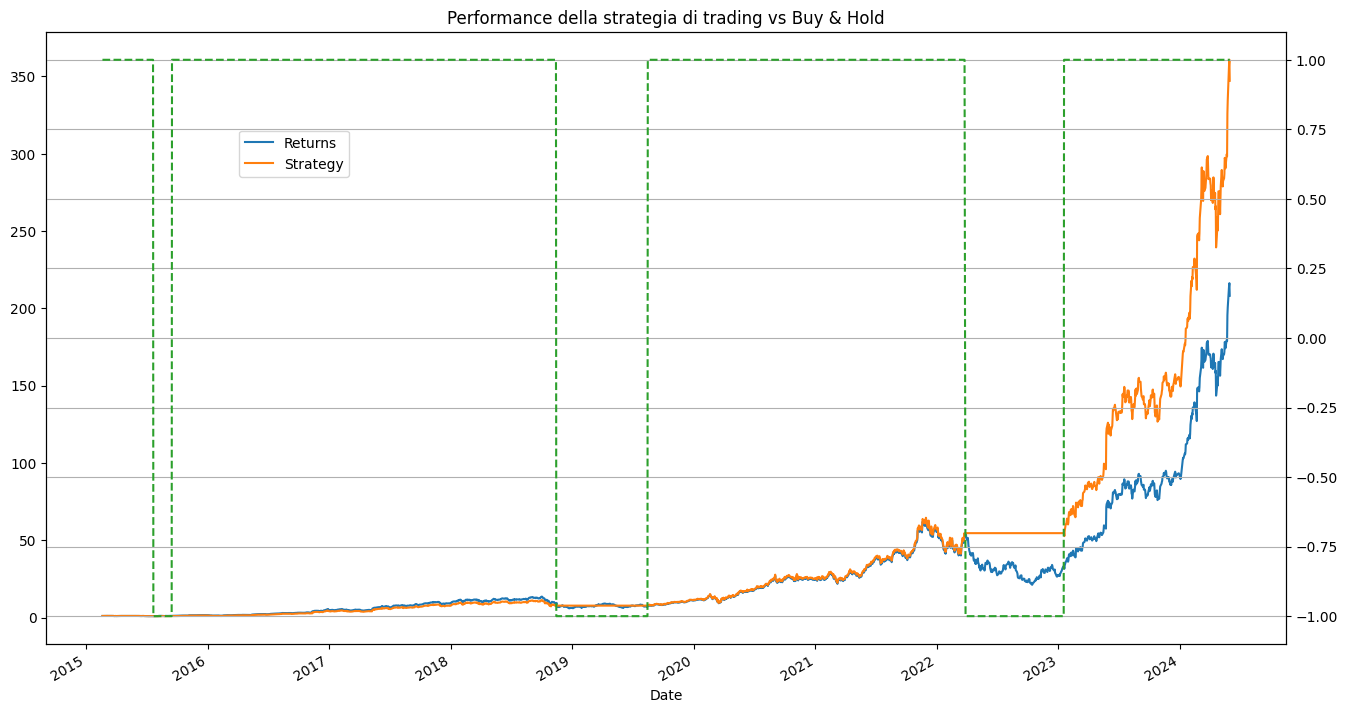

In [448]:
# Visualizzazione dei risultati
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,9))
data['Position'].plot(ax=ax, secondary_y='Position', style = '--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
plt.grid()
plt.title('Performance della strategia di trading vs Buy & Hold')
plt.show()

## 5 - CAPM

### Calcolo del Beta per ciascun titolo rispetto a S&P500

In [449]:
import pandas as pd
import yfinance as yf
import numpy as np

In [450]:
# Scarico i dati storici per l'indice S&P 500
sp500 = yf.download('^GSPC', start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [451]:
# Calcolo i rendimenti giornalieri dell'S&P 500
sp500_returns = sp500.pct_change().dropna()

In [452]:
# Calcolo i rendimenti giornalieri per ciascun titolo
returns = daily_close_px.pct_change().dropna()
returns.head()

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  0.014141 -0.003276  0.002839  0.004517 -0.004224 -0.004039
2014-06-04  0.011419  0.000000  0.002147  0.001439  0.001061  0.001690
2014-06-05  0.003924  0.014464  0.005259  0.017062  0.004237  0.004049
2014-06-06 -0.002750  0.010369 -0.000388  0.006004  0.003692 -0.011425
2014-06-09  0.016001  0.016036  0.000388  0.007899  0.001051 -0.002379

In [453]:
# DataFrame per memorizzare i beta di ciascun titolo
betas = pd.DataFrame(columns=['Beta'])

In [454]:
# Calcola il beta per ciascun titolo
for ticker in returns.columns:
    # Calcola la covarianza tra i rendimenti del titolo e quelli del mercato
    covariance = np.cov(returns[ticker], sp500_returns)[0, 1]
    # Calcola la varianza dei rendimenti del mercato
    market_variance = sp500_returns.var()
    # Calcola il beta
    beta = covariance / market_variance
    # Aggiungi il beta al DataFrame
    betas.loc[ticker] = beta

betas

Beta
AAPL  1.197245
BAC   1.240393
JNJ   0.573976
JPM   1.116090
NVDA  1.693038
PFE   0.631233

### Rendimento atteso annuo per ogni titolo

In [455]:
# Scarico i dati del T-Bill a 1 anno
risk_free_ticker = '^IRX'
risk_free_data = yf.download(risk_free_ticker, start=START_DATE, end=END_DATE)

risk_free_data

[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-06-02  0.030  0.030  0.025  0.025      0.025       0
2014-06-03  0.030  0.030  0.030  0.030      0.030       0
2014-06-04  0.030  0.030  0.028  0.030      0.030       0
2014-06-05  0.030  0.030  0.028  0.030      0.030       0
2014-06-06  0.030  0.030  0.028  0.028      0.028       0
...           ...    ...    ...    ...        ...     ...
2024-05-23  5.240  5.248  5.238  5.245      5.245       0
2024-05-24  5.245  5.248  5.245  5.245      5.245       0
2024-05-28  5.248  5.250  5.248  5.248      5.248       0
2024-05-29  5.250  5.250  5.250  5.250      5.250       0
2024-05-30  5.248  5.250  5.248  5.248      5.248       0

[2516 rows x 6 columns]

In [456]:
# Calcolo il tasso privo di rischio annuale come l'ultimo valore disponibile
risk_free_rate = risk_free_data['Adj Close'].iloc[-1] / 100
risk_free_rate

np.float64(0.05248000144958496)

In [457]:
# Calcolo il rendimento annualizzato dell'S&P 500 (stima del mercato)
annualized_sp500_return = ((1 + sp500_returns.mean()) ** 252) - 1
annualized_sp500_return

np.float64(0.12299429408195972)

In [458]:
# Calcolo il rendimento atteso annuo per ciascun titolo utilizzando il CAPM
expected_returns = pd.DataFrame(columns=['Expected Return'])

for ticker in betas.index:
    beta = betas.loc[ticker, 'Beta']
    expected_return = risk_free_rate + beta * (annualized_sp500_return - risk_free_rate)
    expected_returns.loc[ticker] = expected_return

expected_returns

Expected Return
AAPL         0.136903
BAC          0.139945
JNJ          0.092953
JPM          0.131180
NVDA         0.171863
PFE          0.096991

### Esposizione di ciascun titolo ai fattori di rischio Fama-French

In [459]:
import statsmodels.formula.api as smf
import requests, zipfile
import pandas as pd
import os

In [460]:
# Funzione per scaricare i dati Fama-French
def download_ff_factors():
    zip_file_path = "data/FF_factors/F-F_Research_Data_Factors_daily_CSV.zip"

    if not os.path.exists("data/FF_factors"):
        os.makedirs("data/FF_factors")
    if not os.path.exists(zip_file_path):
        url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"
        response = requests.get(url)

        with open(zip_file_path, "wb") as file:
            file.write(response.content)

    csv_file_path = "data/FF_factors/F-F_Research_Data_Factors_daily.CSV"
    if not os.path.exists(csv_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall("data/FF_factors")

    ff_factors = pd.read_csv(csv_file_path, skiprows=3)
    ff_factors.columns = ["Date", "Mkt-RF", "SMB", "HML", "RF"]
    ff_factors = ff_factors[:-1]  # Remove last row (footer)
    ff_factors["Date"] = pd.to_datetime(ff_factors["Date"], format="%Y%m%d")
    ff_factors.set_index("Date", inplace=True)
    ff_factors = ff_factors / 100  # Convert percentages to decimals
    return ff_factors

In [461]:
# Scarico i dati dei fattori di rischio Fama-French
ff_factors = download_ff_factors()

In [462]:
# Calcolo i rendimenti giornalieri per ciascun titolo
returns = daily_close_px.pct_change().dropna()
returns

Ticker          AAPL       BAC       JNJ       JPM      NVDA       PFE
Date                                                                  
2014-06-03  0.014141 -0.003276  0.002839  0.004517 -0.004224 -0.004039
2014-06-04  0.011419  0.000000  0.002147  0.001439  0.001061  0.001690
2014-06-05  0.003924  0.014464  0.005259  0.017062  0.004237  0.004049
2014-06-06 -0.002750  0.010369 -0.000388  0.006004  0.003692 -0.011425
2014-06-09  0.016001  0.016036  0.000388  0.007899  0.001051 -0.002379
...              ...       ...       ...       ...       ...       ...
2024-05-23 -0.021058 -0.014839 -0.024756 -0.007009  0.093197 -0.030743
2024-05-24  0.016588  0.013531 -0.018236  0.019246  0.025723  0.006622
2024-05-28  0.000053 -0.009572 -0.017623 -0.006029  0.069804 -0.020083
2024-05-29  0.001579 -0.015259  0.000416 -0.006967  0.008112 -0.016961
2024-05-30  0.005255 -0.002324  0.005816  0.006158 -0.037666  0.013659

[2516 rows x 6 columns]

In [463]:
# Filtro i dati Fama-French per includere solo il periodo rilevante
ff_factors = ff_factors.loc[returns.index.min():returns.index.max()]
ff_factors

Mkt-RF     SMB     HML      RF
Date                                      
2014-06-03 -0.0005 -0.0026  0.0016  0.0000
2014-06-04  0.0028  0.0023 -0.0008  0.0000
2014-06-05  0.0077  0.0129 -0.0017  0.0000
2014-06-06  0.0054  0.0048 -0.0001  0.0000
2014-06-09  0.0022  0.0102 -0.0031  0.0000
...            ...     ...     ...     ...
2024-05-23 -0.0085 -0.0059 -0.0064  0.0002
2024-05-24  0.0072  0.0003  0.0016  0.0002
2024-05-28 -0.0004  0.0028 -0.0090  0.0002
2024-05-29 -0.0077 -0.0029 -0.0062  0.0002
2024-05-30 -0.0053  0.0104  0.0100  0.0002

[2516 rows x 4 columns]

In [464]:
# Inizializzo un DataFrame per memorizzare i coefficienti di regressione di ciascun titolo
ff_exposures = pd.DataFrame(index=returns.columns, columns=['Alpha', 'Market', 'SMB', 'HML'])

In [465]:
ff_models = {}
# Eseguo la regressione multipla per ciascun titolo
for ticker in returns.columns:
    # Preparazione dei dati per la regressione
    ff_data = pd.DataFrame({
        'excess_rtn': returns[ticker] - ff_factors['RF'],
        'mkt': ff_factors['Mkt-RF'],
        'smb': ff_factors['SMB'],
        'hml': ff_factors['HML']
    }).dropna()
    
    # Esecuzione della regressione usando la formula
    ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', data=ff_data).fit()
    
    # Memorizzazione dei risultati nel DataFrame
    ff_exposures.loc[ticker, 'Alpha'] = ff_model.params['Intercept']
    ff_exposures.loc[ticker, 'Market'] = ff_model.params['mkt']
    ff_exposures.loc[ticker, 'SMB'] = ff_model.params['smb']
    ff_exposures.loc[ticker, 'HML'] = ff_model.params['hml']

    ff_models[ticker] = ff_model

ff_exposures

Alpha    Market       SMB       HML
Ticker                                        
AAPL    0.000394  1.176317 -0.295582 -0.406431
BAC     0.000103  1.259395   0.02398  1.064862
JNJ    -0.000031  0.578905 -0.397613  0.058151
JPM     0.000258   1.13815 -0.146798  0.883513
NVDA    0.001717  1.638014  0.064011 -0.905946
PFE    -0.000107  0.630703 -0.328107  0.078056

#### AAPL

In [466]:
# Stampa del riepilogo del modello
print('Regression results for AAPL:')
print(ff_models['AAPL'].summary())

Regression results for AAPL:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1283.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:37:45   Log-Likelihood:                 7729.4
No. Observations:                2516   AIC:                        -1.545e+04
Df Residuals:                    2512   BIC:                        -1.543e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004  

#### NVDA

In [467]:
# Stampa del riepilogo del modello
print('Regression results for NVDA:')
print(ff_models['NVDA'].summary())

Regression results for NVDA:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     804.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:37:45   Log-Likelihood:                 6114.9
No. Observations:                2516   AIC:                        -1.222e+04
Df Residuals:                    2512   BIC:                        -1.220e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017  

#### JPM

In [468]:
# Stampa del riepilogo del modello
print('Regression results for JPM:')
print(ff_models['JPM'].summary())

Regression results for JPM:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2471.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:37:45   Log-Likelihood:                 8414.8
No. Observations:                2516   AIC:                        -1.682e+04
Df Residuals:                    2512   BIC:                        -1.680e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   

#### BAC

In [469]:
# Stampa del riepilogo del modello
print('Regression results for BAC:')
print(ff_models['BAC'].summary())

Regression results for BAC:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2417.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:37:45   Log-Likelihood:                 8047.9
No. Observations:                2516   AIC:                        -1.609e+04
Df Residuals:                    2512   BIC:                        -1.606e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   

#### JNJ

In [470]:
# Stampa del riepilogo del modello
print('Regression results for JNJ:')
print(ff_models['JNJ'].summary())

Regression results for JNJ:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     423.8
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          9.78e-223
Time:                        16:37:45   Log-Likelihood:                 8207.8
No. Observations:                2516   AIC:                        -1.641e+04
Df Residuals:                    2512   BIC:                        -1.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.061e-05   

#### PFE

In [471]:
# Stampa del riepilogo del modello
print('Regression results for PFE:')
print(ff_models['PFE'].summary())

Regression results for PFE:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     269.2
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          1.71e-151
Time:                        16:37:45   Log-Likelihood:                 7453.3
No. Observations:                2516   AIC:                        -1.490e+04
Df Residuals:                    2512   BIC:                        -1.488e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001   

## 6 - Costruzione di portafoglio

### Costruzione portafoglio ottimale

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
from functools import partial

In [473]:
# Estraiamo i primi 108 mesi di dati (9 anni)
start_date = '2014-05-31'
end_date = '2023-05-31'
daily_close_px_subset = daily_close_px.loc[start_date:end_date]

#### Rendimenti passati

##### Metodo Analitico

In [474]:
# Funzioni di utilità per calcolare rendimento e volatilità del portafoglio
def portfolio_return(weights, returns):
    return np.sum(weights * returns)

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [475]:
# Funzione per trovare i pesi del portafoglio con il minimo rischio
def min_variance(returns, cov_matrix):
    num_assets = len(returns)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = sco.minimize(partial(portfolio_volatility, cov_matrix=cov_matrix), num_assets * [1. / num_assets,], 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [476]:
# Funzione per calcolare lo Sharpe ratio
def portfolio_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, returns)
    port_volatility = portfolio_volatility(weights, cov_matrix)
    return (port_return - risk_free_rate) / port_volatility

# Funzione per trovare i pesi del portafoglio che massimizza lo Sharpe ratio
def max_sharpe_ratio(returns, cov_matrix, risk_free_rate):
    num_assets = len(returns)
    args = (returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = sco.minimize(lambda x: -portfolio_sharpe_ratio(x, *args), num_assets * [1. / num_assets,], 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [477]:
# Calcoliamo i rendimenti giornalieri e poi convertiamoli in rendimenti annuali
returns_daily = daily_close_px_subset.pct_change().dropna()
returns_annual = returns_daily.mean() * 252
cov_annual = returns_daily.cov() * 252

In [478]:
# Calcoliamo il portafoglio con il minimo rischio
result_min_variance = min_variance(returns_annual, cov_annual)
min_variance_weights = result_min_variance['x']

print("Pesi del portafoglio con il minimo rischio (Analitico):")
for i, ticker in enumerate(daily_close_px.columns):
    print(f"{ticker}: {"{:.3f}".format(min_variance_weights[i])}")
print("Rendimento atteso del portafoglio con il minimo rischio:", portfolio_return(min_variance_weights, returns_annual))
print("Volatilità del portafoglio con il minimo rischio:", portfolio_volatility(min_variance_weights, cov_annual))
print("Sharpe Ratio del portafoglio con il minimo rischio:", portfolio_sharpe_ratio(min_variance_weights, returns_annual, cov_annual, risk_free_rate))

Pesi del portafoglio con il minimo rischio (Analitico):
AAPL: 0.103
BAC: 0.000
JNJ: 0.601
JPM: 0.087
NVDA: 0.000
PFE: 0.209
Rendimento atteso del portafoglio con il minimo rischio: 0.11789250789220725
Volatilità del portafoglio con il minimo rischio: 0.16944488485523623
Sharpe Ratio del portafoglio con il minimo rischio: 0.38604001825435386


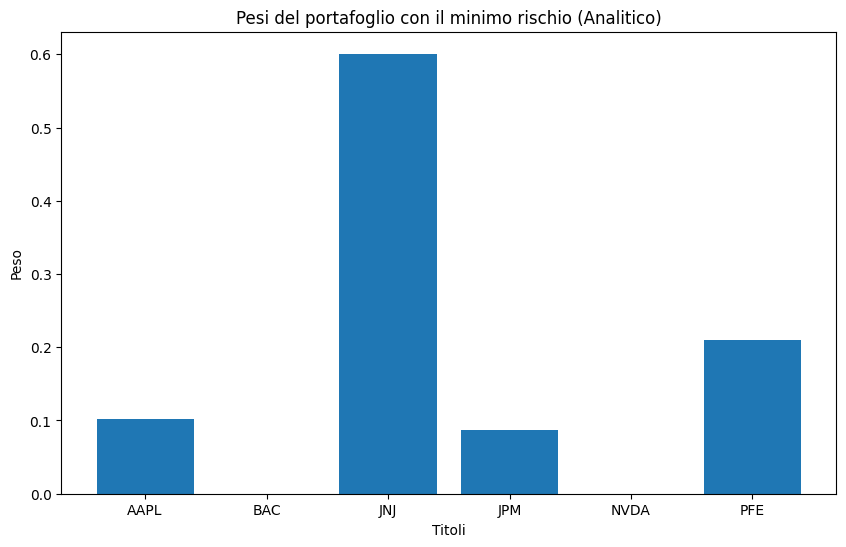

In [479]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(daily_close_px.columns, min_variance_weights)
plt.title('Pesi del portafoglio con il minimo rischio (Analitico)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

In [480]:
# Calcoliamo il portafoglio che massimizza lo Sharpe ratio
result_sharpe = max_sharpe_ratio(returns_annual, cov_annual, risk_free_rate)
max_sharpe_weights = result_sharpe['x']

print("Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico):")
for i, ticker in enumerate(daily_close_px.columns):
    print(f"{ticker}: {"{:.3f}".format(max_sharpe_weights[i])}")
print("Rendimento atteso del portafoglio che massimizza lo Sharpe ratio:", portfolio_return(max_sharpe_weights, returns_annual))
print("Volatilità del portafoglio che massimizza lo Sharpe ratio:", portfolio_volatility(max_sharpe_weights, cov_annual))
print("Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio:", portfolio_sharpe_ratio(max_sharpe_weights, returns_annual, cov_annual, risk_free_rate))

Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico):
AAPL: 0.254
BAC: 0.000
JNJ: 0.000
JPM: 0.000
NVDA: 0.746
PFE: 0.000
Rendimento atteso del portafoglio che massimizza lo Sharpe ratio: 0.5243628019107314
Volatilità del portafoglio che massimizza lo Sharpe ratio: 0.40192512625720755
Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio: 1.1740564837421241


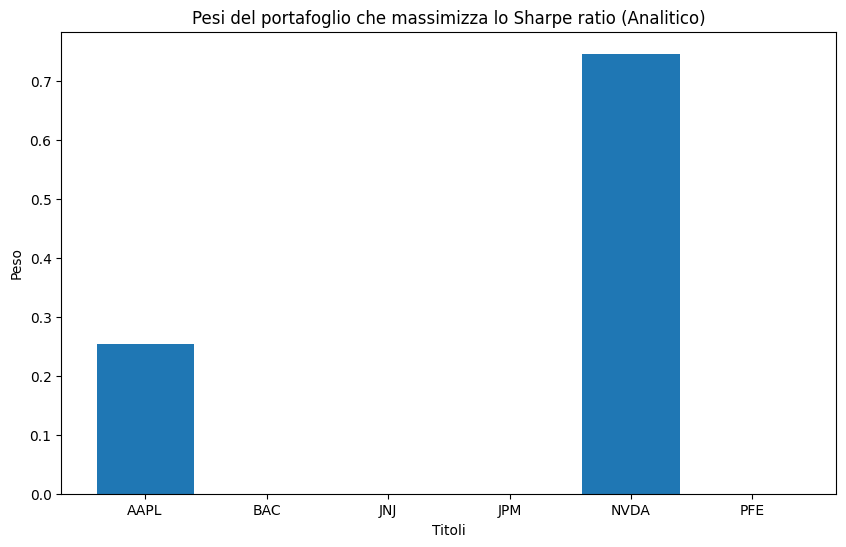

In [481]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(daily_close_px.columns, max_sharpe_weights)
plt.title('Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

##### Metodo di Simulazione

In [482]:
# Numero di portafogli da simulare
n_portfolios = 100000
n_assets = len(daily_close_px.columns)

In [483]:
# Simuliamo pesi casuali
np.random.seed(42)
weights = np.random.random((n_portfolios, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [484]:
# Calcoliamo i rendimenti e le volatilità dei portafogli simulati
port_returns = np.dot(weights, returns_annual)
port_volatility = np.sqrt(np.einsum('ij,jk,ik->i', weights, cov_annual, weights))
port_sharpe = (port_returns - risk_free_rate) / port_volatility

In [485]:
# Troviamo il portafoglio con il massimo Sharpe ratio
max_sharpe_idx = np.argmax(port_sharpe)
max_sharpe_weights = weights[max_sharpe_idx]

print("Pesi del portafoglio con il massimo Sharpe ratio (Simulazione Monte Carlo):")
for i, ticker in enumerate(daily_close_px.columns):
    print(f"{ticker}: {"{:.3f}".format(max_sharpe_weights[i])}")
print("Rendimento atteso del portafoglio con il massimo Sharpe ratio:", port_returns[max_sharpe_idx])
print("Volatilità del portafoglio con il massimo Sharpe ratio:", port_volatility[max_sharpe_idx])
print("Sharpe Ratio del portafoglio con il massimo Sharpe ratio:", port_sharpe[max_sharpe_idx])

Pesi del portafoglio con il massimo Sharpe ratio (Simulazione Monte Carlo):
AAPL: 0.339
BAC: 0.004
JNJ: 0.065
JPM: 0.023
NVDA: 0.555
PFE: 0.014
Rendimento atteso del portafoglio con il massimo Sharpe ratio: 0.44449109736505926
Volatilità del portafoglio con il massimo Sharpe ratio: 0.3385075782152049
Sharpe Ratio del portafoglio con il massimo Sharpe ratio: 1.1580570750657013


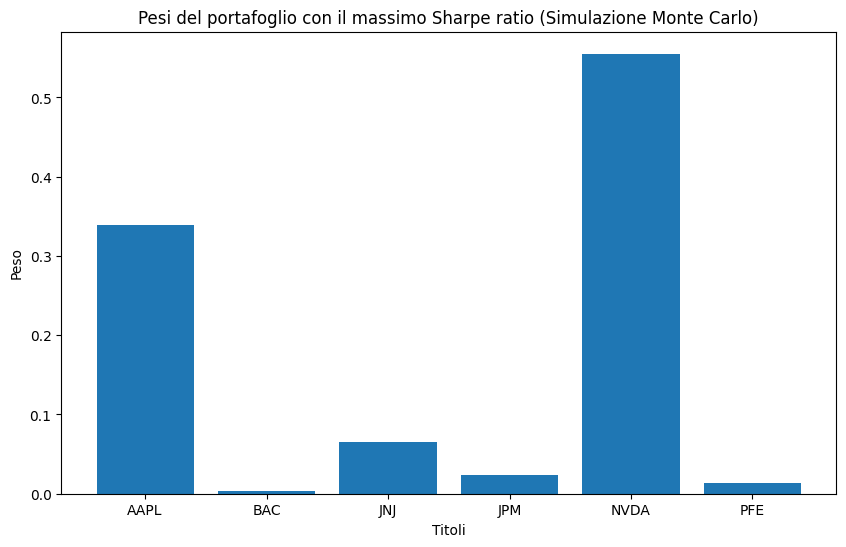

In [486]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(daily_close_px.columns, max_sharpe_weights)
plt.title('Pesi del portafoglio con il massimo Sharpe ratio (Simulazione Monte Carlo)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

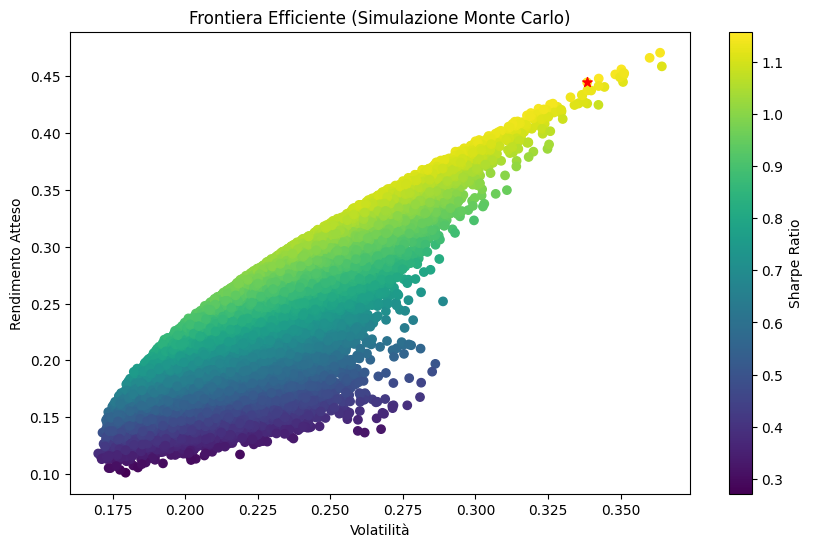

In [487]:
# Plot della frontiera efficiente
plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=port_sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(port_volatility[max_sharpe_idx], port_returns[max_sharpe_idx], c='red', s=50, marker='*')
plt.title('Frontiera Efficiente (Simulazione Monte Carlo)')
plt.xlabel('Volatilità')
plt.ylabel('Rendimento Atteso')
plt.show()

#### Rendimenti Attesi

In [488]:
expected_returns

Expected Return
AAPL         0.136903
BAC          0.139945
JNJ          0.092953
JPM          0.131180
NVDA         0.171863
PFE          0.096991

##### Metodo Analitico

In [489]:
# Calcolare i rendimenti giornalieri e poi convertirli in rendimenti annuali
returns_daily_expected = daily_close_px_subset.pct_change().dropna()
cov_annual = returns_daily_expected.cov() * 252

In [490]:
# Rendimenti annuali attesi
returns_annual_expected = expected_returns['Expected Return']

In [491]:
# Calcolare il portafoglio che minimizza la varianza utilizzando i rendimenti attesi
result_min_variance_expected = min_variance(returns_annual_expected, cov_annual)
min_variance_weights_expected = result_min_variance_expected['x']

print("Pesi del portafoglio con il minimo rischio (Analitico, Rendimenti Attesi):")
for i, ticker in enumerate(expected_returns.index):
    print(f"{ticker}: {min_variance_weights_expected[i]:.3f}")
print("Rendimento atteso del portafoglio con il minimo rischio:", portfolio_return(min_variance_weights_expected, returns_annual_expected))
print("Volatilità del portafoglio con il minimo rischio:", portfolio_volatility(min_variance_weights_expected, cov_annual))
print("Sharpe Ratio del portafoglio con il minimo rischio:", portfolio_sharpe_ratio(min_variance_weights_expected, returns_annual_expected, cov_annual, risk_free_rate))

Pesi del portafoglio con il minimo rischio (Analitico, Rendimenti Attesi):
AAPL: 0.103
BAC: 0.000
JNJ: 0.601
JPM: 0.087
NVDA: 0.000
PFE: 0.209
Rendimento atteso del portafoglio con il minimo rischio: 0.10164047140328808
Volatilità del portafoglio con il minimo rischio: 0.16944488485523623
Sharpe Ratio del portafoglio con il minimo rischio: 0.2901266095798816


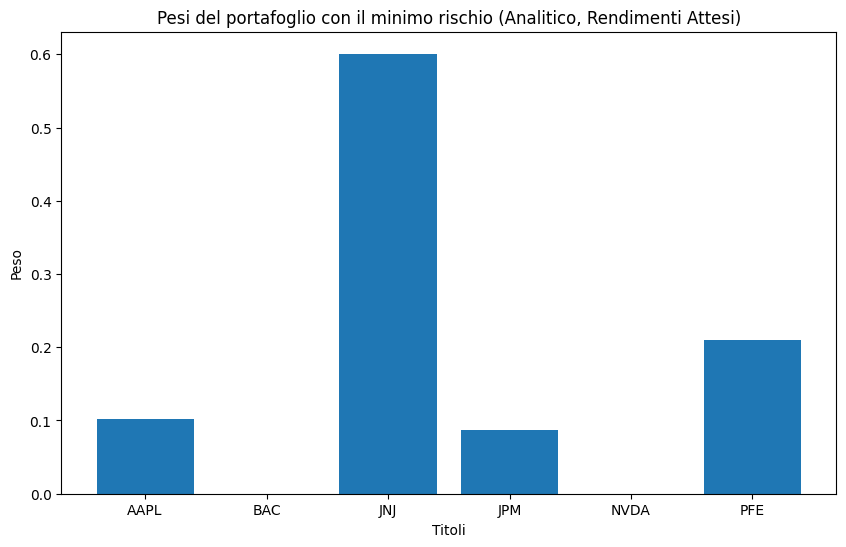

In [492]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.index, min_variance_weights_expected)
plt.title('Pesi del portafoglio con il minimo rischio (Analitico, Rendimenti Attesi)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

In [493]:
# Calcolare il portafoglio che massimizza lo Sharpe ratio utilizzando i rendimenti attesi
result_sharpe_expected = max_sharpe_ratio(returns_annual_expected, cov_annual, risk_free_rate)
max_sharpe_weights_expected = result_sharpe_expected['x']

print("Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico, Rendimenti Attesi):")
for i, ticker in enumerate(expected_returns.index):
    print(f"{ticker}: {max_sharpe_weights_expected[i]:.3f}")
print("Rendimento atteso del portafoglio che massimizza lo Sharpe ratio:", portfolio_return(max_sharpe_weights_expected, returns_annual_expected))
print("Volatilità del portafoglio che massimizza lo Sharpe ratio:", portfolio_volatility(max_sharpe_weights_expected, cov_annual))
print("Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio:", portfolio_sharpe_ratio(max_sharpe_weights_expected, returns_annual_expected, cov_annual, risk_free_rate))

Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico, Rendimenti Attesi):
AAPL: 0.262
BAC: 0.130
JNJ: 0.213
JPM: 0.174
NVDA: 0.121
PFE: 0.100
Rendimento atteso del portafoglio che massimizza lo Sharpe ratio: 0.1272266110124437
Volatilità del portafoglio che massimizza lo Sharpe ratio: 0.20988680107604343
Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio: 0.3561282042493827


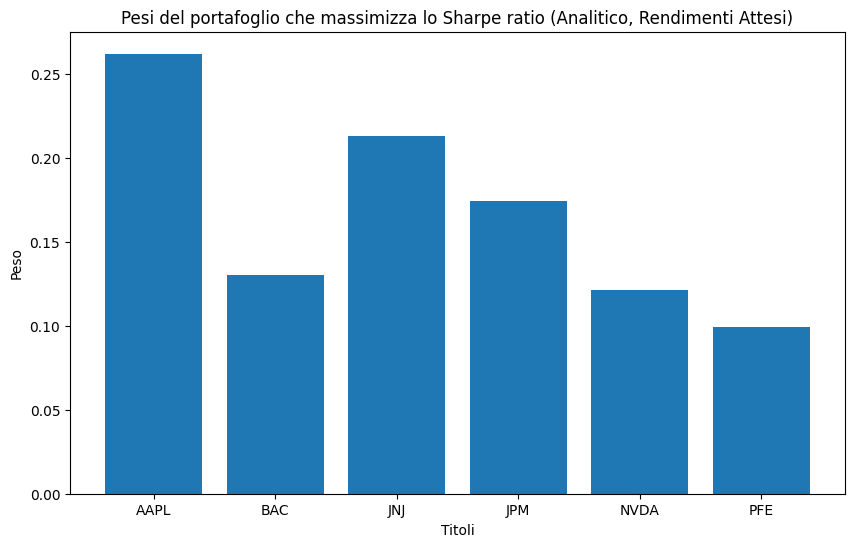

In [494]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.index, max_sharpe_weights_expected)
plt.title('Pesi del portafoglio che massimizza lo Sharpe ratio (Analitico, Rendimenti Attesi)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

##### Metodo di Simulazione

In [495]:
# Numero di portafogli da simulare
n_portfolios = 100000
n_assets = len(expected_returns.index)

In [496]:
# Simuliamo pesi casuali
np.random.seed(42)
weights = np.random.random((n_portfolios, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [497]:
# Calcoliamo i rendimenti e le volatilità dei portafogli simulati
port_returns_expected = np.dot(weights, returns_annual_expected)
port_volatility_expected = np.sqrt(np.einsum('ij,jk,ik->i', weights, cov_annual, weights))
port_sharpe_expected = (port_returns_expected - risk_free_rate) / port_volatility_expected

In [498]:
# Troviamo il portafoglio con il massimo Sharpe ratio
max_sharpe_idx_expected = np.argmax(port_sharpe_expected)
max_sharpe_weights_expected = weights[max_sharpe_idx_expected]

print("Pesi del portafoglio che massimizza lo Sharpe ratio (Simulazione Monte Carlo, Rendimenti Attesi):")
for i, ticker in enumerate(expected_returns.index):
    print(f"{ticker}: {max_sharpe_weights_expected[i]:.3f}")
print("Rendimento atteso del portafoglio che massimizza lo Sharpe ratio:", port_returns_expected[max_sharpe_idx_expected])
print("Volatilità del portafoglio che massimizza lo Sharpe ratio:", port_volatility_expected[max_sharpe_idx_expected])
print("Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio:", port_sharpe_expected[max_sharpe_idx_expected])

Pesi del portafoglio che massimizza lo Sharpe ratio (Simulazione Monte Carlo, Rendimenti Attesi):
AAPL: 0.263
BAC: 0.105
JNJ: 0.183
JPM: 0.208
NVDA: 0.119
PFE: 0.123
Rendimento atteso del portafoglio che massimizza lo Sharpe ratio: 0.12723643421077552
Volatilità del portafoglio che massimizza lo Sharpe ratio: 0.20999252193277265
Sharpe Ratio del portafoglio che massimizza lo Sharpe ratio: 0.35599569009949417


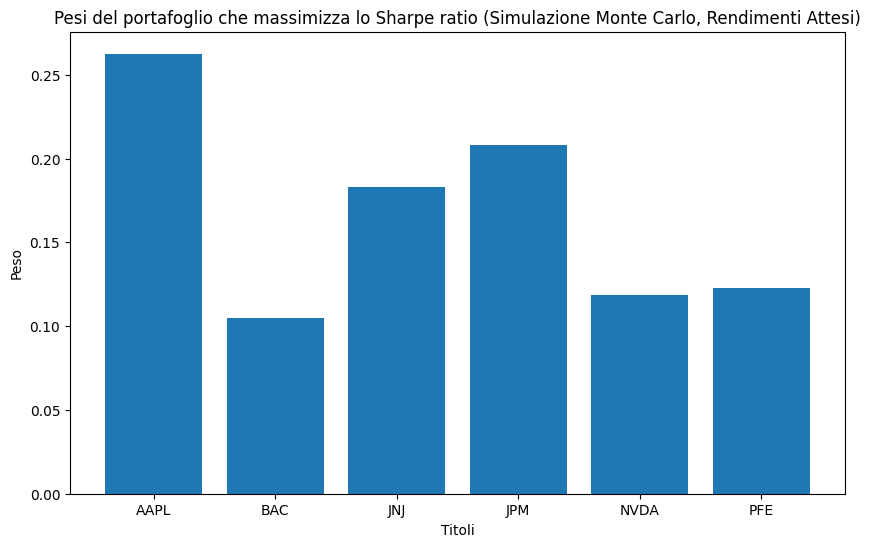

In [499]:
# Visualizzazione dei pesi del portafoglio
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.index, max_sharpe_weights_expected)
plt.title('Pesi del portafoglio che massimizza lo Sharpe ratio (Simulazione Monte Carlo, Rendimenti Attesi)')
plt.xlabel('Titoli')
plt.ylabel('Peso')
plt.show()

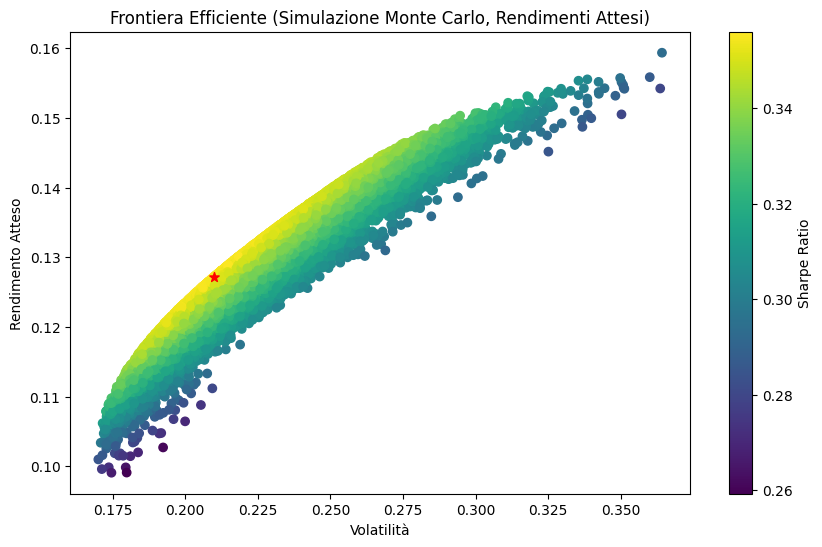

In [500]:
# Plot della frontiera efficiente
plt.figure(figsize=(10, 6))
plt.scatter(port_volatility_expected, port_returns_expected, c=port_sharpe_expected, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(port_volatility_expected[max_sharpe_idx_expected], port_returns_expected[max_sharpe_idx_expected], c='red', s=50, marker='*')
plt.title('Frontiera Efficiente (Simulazione Monte Carlo, Rendimenti Attesi)')
plt.xlabel('Volatilità')
plt.ylabel('Rendimento Atteso')
plt.show()


### Calcolo del beta

In [501]:
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [502]:
# Scarica i dati di S&P 500
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [503]:
# Calcola i rendimenti giornalieri dell'S&P 500
sp500_returns = sp500.pct_change().dropna()

In [504]:
# Calcola i rendimenti del portafoglio con massimo Sharpe ratio con i ritorni passati
portfolio_max_sharpe_returns = (returns_daily * max_sharpe_weights).sum(axis=1)

In [505]:
# Calcola i rendimenti del portafoglio con massimo Sharpe ratio con i ritorni attesi
portfolio_max_sharpe_returns_expected = (returns_daily_expected * max_sharpe_weights_expected).sum(axis=1)

In [506]:
# Allinea temporalmente i rendimenti del portafoglio e del mercato
aligned_max_sharpe, aligned_sp500_max_sharpe = portfolio_max_sharpe_returns.align(sp500_returns, join='inner')
aligned_max_sharpe_expected, aligned_sp500_max_sharpe_expected = portfolio_max_sharpe_returns_expected.align(sp500_returns, join='inner')

In [507]:
# Funzione per calcolare il beta
def calculate_beta(portfolio_returns, market_returns):
    # Converte i dati in formato adatto per il modello di regressione lineare
    portfolio_returns = portfolio_returns.values.reshape(-1, 1)
    market_returns = market_returns.values.reshape(-1, 1)
    
    # Crea e addestra il modello
    reg = LinearRegression().fit(market_returns, portfolio_returns)
    
    # Il coefficiente del mercato è il beta
    beta = reg.coef_[0][0]
    
    return beta

In [508]:
# Calcola il beta per entrambi i portafogli
beta_max_sharpe = calculate_beta(aligned_max_sharpe, aligned_sp500_max_sharpe)
beta_max_sharpe_expected = calculate_beta(aligned_max_sharpe_expected, aligned_sp500_max_sharpe_expected)

print("Beta del portafoglio con massimo Sharpe ratio (Ritorni Passati):", beta_max_sharpe)
print("Beta del portafoglio con massimo Sharpe ratio (Ritorni Attesi):", beta_max_sharpe_expected)

Beta del portafoglio con massimo Sharpe ratio (Ritorni Passati): 1.4129323323712766
Beta del portafoglio con massimo Sharpe ratio (Ritorni Attesi): 1.067792516646883


### Confronto dei portafogli

In [509]:
import numpy as np

# Calcola i pesi uguali per il portafoglio effettivo
equal_weights = np.ones(len(daily_close_px.columns)) / len(daily_close_px.columns)

# Calcola i rendimenti del portafoglio effettivo
portfolio_equal_returns = (returns_daily * equal_weights).sum(axis=1)

In [510]:
# Calcola i rendimenti cumulativi per confronto
cumulative_returns_equal = (1 + portfolio_equal_returns).cumprod()
cumulative_returns_max_sharpe = (1 + aligned_max_sharpe).cumprod()
cumulative_returns_max_sharpe_expected = (1 + aligned_max_sharpe_expected).cumprod()

In [511]:
# Calcola i rendimenti annuali medi dei portafogli
annual_return_equal = (cumulative_returns_equal[-1]**(252/len(cumulative_returns_equal))) - 1
annual_return_max_sharpe = (cumulative_returns_max_sharpe[-1]**(252/len(cumulative_returns_max_sharpe))) - 1
annual_return_max_sharpe_expected = (cumulative_returns_max_sharpe_expected[-1]**(252/len(cumulative_returns_max_sharpe_expected))) - 1

In [512]:
print("Rendimento annuale medio del portafoglio effettivo:", annual_return_equal)
print("Rendimento annuale medio del portafoglio con massimo Sharpe ratio (Ritorni Passati):", annual_return_max_sharpe)
print("Rendimento annuale medio del portafoglio con massimo Sharpe ratio (Ritorni Attesi):", annual_return_max_sharpe_expected)

Rendimento annuale medio del portafoglio effettivo: 0.22941213518544457
Rendimento annuale medio del portafoglio con massimo Sharpe ratio (Ritorni Passati): 0.47814605041272684
Rendimento annuale medio del portafoglio con massimo Sharpe ratio (Ritorni Attesi): 0.2245264206574582


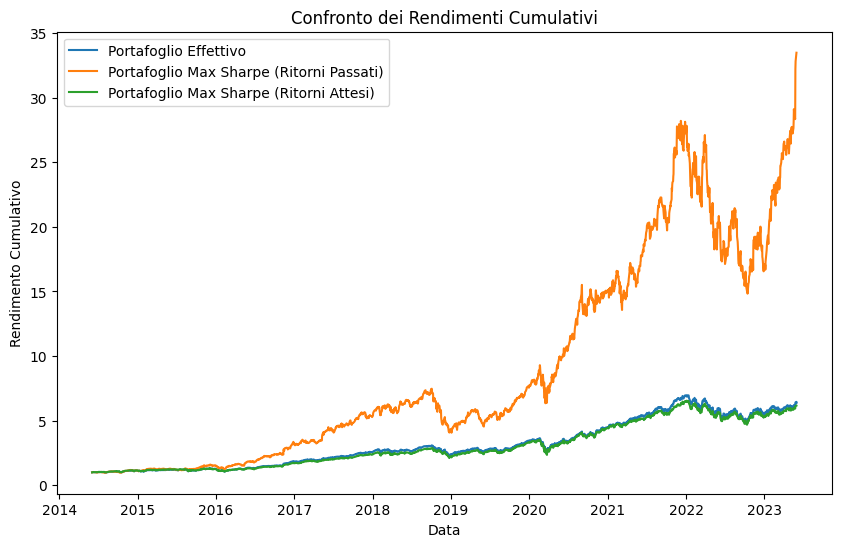

In [513]:
# Confronta i rendimenti cumulativi tramite un grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_equal, label='Portafoglio Effettivo')
plt.plot(cumulative_returns_max_sharpe, label='Portafoglio Max Sharpe (Ritorni Passati)')
plt.plot(cumulative_returns_max_sharpe_expected, label='Portafoglio Max Sharpe (Ritorni Attesi)')
plt.legend()
plt.title('Confronto dei Rendimenti Cumulativi')
plt.xlabel('Data')
plt.ylabel('Rendimento Cumulativo')
plt.show()
